# Telecom Churn Prediction Case Study

We have the dataset containing customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

Data is from Indian and the southeast Asian market where approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

This data is for Prepaid users where detecting a churn is difficult , customers will simply stop using the service without informing the service provider. 

We have to predict __Usage-based churn__ where Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. 

### Objective of this case study: 
1) Reduce churn of high-value customers by __predicting the customers who will churn__ beforehand and take measures to retain them. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

2) __Identify important variables that are strong predictors of churn__. These variables may also indicate why customers choose to switch to other networks.

# 1. Data Preperation

- Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Apply formatting to floats
pd.options.display.float_format = '{:20,.2f}'.format
np.random.seed(0)

import warnings # supress warnings
warnings.filterwarnings('ignore')

## 1.1 Import/read data

In [2]:
#Read data from csv file
datapath = "/content/drive/My Drive/Colab Notebooks"
churn = pd.read_csv("telecom_churn_data.csv")
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## 1.2 Data Understanding

__Objective:__ 
1. Find no of rows/columns in churn dataset.
2. Identify no of unique values in each column.
3. Identify percentage of null values in each column.

In [3]:
#find no of rows and columns in loan_df
churn.shape

(99999, 226)

In [4]:
#find data type of each column and number of non null values in each columns
churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [5]:
#percentage of null values in each column
round(100*(churn.isnull().sum()/len(churn.index)),2)

mobile_number                          0.00
circle_id                              0.00
loc_og_t2o_mou                         1.02
std_og_t2o_mou                         1.02
loc_ic_t2o_mou                         1.02
last_date_of_month_6                   0.00
last_date_of_month_7                   0.60
last_date_of_month_8                   1.10
last_date_of_month_9                   1.66
arpu_6                                 0.00
arpu_7                                 0.00
arpu_8                                 0.00
arpu_9                                 0.00
onnet_mou_6                            3.94
onnet_mou_7                            3.86
onnet_mou_8                            5.38
onnet_mou_9                            7.75
offnet_mou_6                           3.94
offnet_mou_7                           3.86
offnet_mou_8                           5.38
offnet_mou_9                           7.75
roam_ic_mou_6                          3.94
roam_ic_mou_7                   

There are some columns with greater than 70% null values like night_pck_user_* and fb_user_*

In [6]:
#Lets understand the distribution of numeric columns
churn.describe()

mobile_number            circle_id       loc_og_t2o_mou  \
count            99,999.00            99,999.00            98,981.00   
mean      7,001,207,270.39               109.00                 0.00   
std             695,669.39                 0.00                 0.00   
min       7,000,000,074.00               109.00                 0.00   
25%       7,000,606,232.50               109.00                 0.00   
50%       7,001,204,632.00               109.00                 0.00   
75%       7,001,812,030.50               109.00                 0.00   
max       7,002,410,905.00               109.00                 0.00   

            std_og_t2o_mou       loc_ic_t2o_mou               arpu_6  \
count            98,981.00            98,981.00            99,999.00   
mean                  0.00                 0.00               282.99   
std                   0.00                 0.00               328.44   
min                   0.00                 0.00            -2,258.71   
25%                   0.00                 0.00                93.41   
50%                   0.00                 0.00               197.70   
75%                   0.00                 0.00               371.06   
max                   0.00                 0.00            27,731.09   

                    arpu_7               arpu_8               arpu_9  \
count            99,999.00            99,999.00            99,999.00   
mean                278.54               279.15               261.65   
std                 338.16               344.47               342.00   
min              -2,014.05              -945.81            -1,899.51   
25%                  86.98                84.13                62.69   
50%                 191.64               192.08               176.85   
75%                 365.34               369.37               353.47   
max              35,145.83            33,543.62            38,805.62   

               onnet_mou_6         ...                   sachet_3g_9  \
count            96,062.00         ...                     99,999.00   
mean                132.40         ...                          0.08   
std                 297.21         ...                          0.65   
min                   0.00         ...                          0.00   
25%                   7.38         ...                          0.00   
50%                  34.31         ...                          0.00   
75%                 118.74         ...                          0.00   
max               7,376.71         ...                         49.00   

                 fb_user_6            fb_user_7            fb_user_8  \
count            25,153.00            25,571.00            26,339.00   
mean                  0.91                 0.91                 0.89   
std                   0.28                 0.29                 0.31   
min                   0.00                 0.00                 0.00   
25%                   1.00                 1.00                 1.00   
50%                   1.00                 1.00                 1.00   
75%                   1.00                 1.00                 1.00   
max                   1.00                 1.00                 1.00   

                 fb_user_9                  aon           aug_vbc_3g  \
count            25,922.00            99,999.00            99,999.00   
mean                  0.86             1,219.85                68.17   
std                   0.35               954.73               267.58   
min                   0.00               180.00                 0.00   
25%                   1.00               467.00                 0.00   
50%                   1.00               863.00                 0.00   
75%                   1.00             1,807.50                 0.00   
max                   1.00             4,337.00            12,916.22   

                jul_vbc_3g           jun_vbc_3g           sep_vbc_3g  
count            99,999.00            99,999.00 

In [7]:
#no. of unique values in each column
churn.nunique()

mobile_number           99999
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
                        ...  
arpu_2g_9                6795
night_pck_user_6            2
night_pck_

There are some columns with same value for all rows like last_date_of_month_* and there are few with 2 distinct values. These columns are most likely categorical columsn like fb_user_*. 

In [8]:
# let's look at the first few rows of the df
churn.head()

mobile_number  circle_id       loc_og_t2o_mou       std_og_t2o_mou  \
0     7000842753        109                 0.00                 0.00   
1     7001865778        109                 0.00                 0.00   
2     7001625959        109                 0.00                 0.00   
3     7001204172        109                 0.00                 0.00   
4     7000142493        109                 0.00                 0.00   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.00            6/30/2014            7/31/2014   
1                 0.00            6/30/2014            7/31/2014   
2                 0.00            6/30/2014            7/31/2014   
3                 0.00            6/30/2014            7/31/2014   
4                 0.00            6/30/2014            7/31/2014   

  last_date_of_month_8 last_date_of_month_9               arpu_6  \
0            8/31/2014            9/30/2014               197.38   
1            8/31/2014            9/30/2014                34.05   
2            8/31/2014            9/30/2014               167.69   
3            8/31/2014            9/30/2014               221.34   
4            8/31/2014            9/30/2014               261.64   

          ...           sachet_3g_9            fb_user_6            fb_user_7  \
0         ...                     0                 1.00                 1.00   
1         ...                     0                  nan                 1.00   
2         ...                     0                  nan                  nan   
3         ...                     0                  nan                  nan   
4         ...                     0                 0.00                  nan   

             fb_user_8            fb_user_9   aon           aug_vbc_3g  \
0                 1.00                  nan   968                30.40   
1                 1.00                  nan  1006                 0.00   
2                  nan                 1.00  1103                 0.00   
3                  nan                  nan  2491                 0.00   
4                  nan                  nan  1526                 0.00   

            jul_vbc_3g           jun_vbc_3g           sep_vbc_3g  
0                 0.00               101.20                 3.58  
1                 0.00                 0.00                 0.00  
2                 0.00                 4.17                 0.00  
3                 0.00                 0.00                 0.00  
4                 0.00                 0.00                 0.00  

[5 rows x 226 columns]

__Summary:__
1. There are total 99999 rows and 226 columns in churn.
2. There are some columns having greater than 70% null values.
3. Also, there are some columns having only one or two unique value.
4. mobile number is unique in all the records.
6. Also, there are outliers in some columns. We need to analyse these columns further.
7. There are columns having NAN & only one unique value.

### 1.3 Data Cleaning and Manipulation

#### 1.3.1 Drop the columns where all entries are NA

In [9]:
#Drop the columns where all entries are na
filtered_data = churn.dropna(axis=1, how='all')
print("Number of columns after dropping columns with all NAs: ", len(filtered_data.columns))

Number of columns after dropping columns with all NAs:  226


Delete churn to free up memory

In [10]:
del churn

#### 1.3.2 Filter high-value customers 
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [11]:
#Calculate data recharge amount
#As seen earlier, there many NAs in data recharge columns, assign them 0
filtered_data["total_rech_data_6"].fillna(0, inplace=True)
filtered_data["total_rech_data_7"].fillna(0, inplace=True)
filtered_data["total_rech_data_8"].fillna(0, inplace=True)
filtered_data["total_rech_data_9"].fillna(0, inplace=True)
filtered_data["av_rech_amt_data_6"].fillna(0, inplace=True)
filtered_data["av_rech_amt_data_7"].fillna(0, inplace=True)
filtered_data["av_rech_amt_data_8"].fillna(0, inplace=True)
filtered_data["av_rech_amt_data_9"].fillna(0, inplace=True)
#Calculate data recharge amount
filtered_data["total_data_rech_amt_6"] = filtered_data["total_rech_data_6"]*filtered_data['av_rech_amt_data_6']
filtered_data["total_data_rech_amt_7"] = filtered_data["total_rech_data_7"]*filtered_data['av_rech_amt_data_7']
filtered_data["total_data_rech_amt_8"] = filtered_data["total_rech_data_8"]*filtered_data['av_rech_amt_data_8']
filtered_data["total_data_rech_amt_9"] = filtered_data["total_rech_data_9"]*filtered_data['av_rech_amt_data_9']

In [12]:
#Calculate average recharge for both calls and data
filtered_data['avg_rech']=(filtered_data['total_rech_amt_6']+filtered_data['total_rech_amt_7']+filtered_data['total_data_rech_amt_6']+filtered_data['total_data_rech_amt_7'])/2

In [13]:
#Calculate 70th percentile of avg_rech column. We need this to identify high value customers
rechForHighValCust = np.percentile(filtered_data['avg_rech'],70)
print(rechForHighValCust)

478.0


In [14]:
#Filter High Value customers
filtered_data= filtered_data[filtered_data['avg_rech'] >= rechForHighValCust]

In [15]:
print(len(filtered_data))

30001


After filtering High value customers, we are left with ~30000 rows.

In [16]:
#Remove unnecessary columns
#We do not require following-data recharge columns because we have derived data recharge amt
filtered_data = filtered_data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'], axis=1)
print("Number of columns: ", len(filtered_data.columns))

Number of columns:  223


#### 1.3.3 Tag churners
- Tag churners and remove attributes of the churn phase.
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase


- The attributes to be used for tagging churners are:

    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [17]:
#Check if any of the columns used to calculate churn have null values
for column in ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']:
    if filtered_data[column].isnull().any():
           print('{0}: {1}'.format(column, filtered_data[column].isnull().sum()))

In [18]:
filtered_data['last_month_usage']=filtered_data['total_ic_mou_9']+filtered_data['total_og_mou_9']+filtered_data['vol_2g_mb_9']+filtered_data['vol_3g_mb_9']
filtered_data['churn'] = np.where(filtered_data['last_month_usage']>0, 0, 1)

In [19]:
#Drop columns used for churn
filtered_data=filtered_data.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','last_month_usage'], axis=1)
print("Number of columns: ", len(filtered_data.columns))

Number of columns:  220


In [20]:
#Drop other columns for last month(9/September)
last_mnth_cols = [x for x in filtered_data.columns if "9" in x or "sep" in x]
filtered_data = filtered_data.drop(last_mnth_cols,axis=1)
print("Number of columns: ", len(filtered_data.columns))

Number of columns:  170


#### 1.3.4 Create Dummy Variables

In [21]:
filtered_data.nunique().sort_values(ascending=True)

std_og_t2c_mou_6            1
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
std_ic_t2o_mou_6            1
std_ic_t2o_mou_7            1
std_ic_t2o_mou_8            1
std_og_t2c_mou_7            1
std_og_t2c_mou_8            1
night_pck_user_6            2
night_pck_user_7            2
night_pck_user_8            2
churn                       2
fb_user_8                   2
fb_user_7                   2
fb_user_6                   2
monthly_2g_6                5
monthly_2g_8                6
monthly_2g_7                6
monthly_3g_8               12
monthly_3g_6               12
monthly_3g_7               15
count_rech_3g_6            25
sachet_3g_6                25
sachet_3g_7                27
count_rech_3g_7            28
                        ...  
loc_ic_t2m_mou_8        15122
loc_og_t2m_mou_8        15130
loc_ic_t2m

Night_pck_user* and fb_user_* have 2 disticts values and they are 0s and 1s

#### These are the Categorical Variables which have only two counts 0 and 1.
1. _night_pck_user_6
2. _night_pck_user_7
3. _night_pck_user_8
4. _night_pck_user_9
5. _fb_user_6
6. _fb_user_7
7. _fb_user_8
8. _fb_user_9

In [22]:
print(filtered_data['night_pck_user_6'].value_counts())
print(filtered_data['night_pck_user_7'].value_counts())
print(filtered_data['night_pck_user_8'].value_counts())
print(filtered_data['fb_user_6'].value_counts())
print(filtered_data['fb_user_7'].value_counts())
print(filtered_data['fb_user_8'].value_counts())

0.00    16349
1.00      407
Name: night_pck_user_6, dtype: int64
0.00    16682
1.00      375
Name: night_pck_user_7, dtype: int64
0.00    15612
1.00      341
Name: night_pck_user_8, dtype: int64
1.00    15525
0.00     1231
Name: fb_user_6, dtype: int64
1.00    15722
0.00     1335
Name: fb_user_7, dtype: int64
1.00    14313
0.00     1640
Name: fb_user_8, dtype: int64


Create dummy variables for these. This will update the same column and fill NAs with 0.

In [23]:
def create_dummy(feature,filtered_df):
    dummy = pd.get_dummies(filtered_df[feature], prefix=feature,drop_first = True)
    # Add the results to the original filtered_df dataframe
    filtered_df[feature] = dummy
    return filtered_df

In [24]:
categorical_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
for col in categorical_cols:
    filtered_data=create_dummy(col,filtered_data)

#### 1.3.5 Data Cleaning

Drop the columns with only 1 distinct value

In [25]:
#Drop the columns with only 1 distinct value
filtered_data = filtered_data.loc[:,filtered_data.apply(pd.Series.nunique) != 1]
print("Number of columns after dropping columns with only 1 distinct value: ", len(filtered_data.columns))

Number of columns after dropping columns with only 1 distinct value:  157


Drop all the columns with greater than 60% of NA values

In [26]:
#drop all the columns with greater than 60% of NA values
filtered_data = filtered_data.dropna(thresh=int(filtered_data.shape[0]*.60),how='all', axis=1)
print("Number of columns after dropping columns with > 60% NAs: ", len(filtered_data.columns))

Number of columns after dropping columns with > 60% NAs:  139


Remove other unnecessary columns

In [27]:
#Remove unnecessary columns
#We do not require following-data recharge columns because we have derived data recharge amt
#filtered_data = filtered_data.drop([''], axis=1)
print("Number of columns: ", len(filtered_data.columns))

Number of columns:  139


In [28]:
filtered_data.describe(include = 'all')

mobile_number               arpu_6               arpu_7  \
count             30,001.00            30,001.00            30,001.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean       7,001,206,159.56               558.49               560.78   
std              690,878.42               460.64               479.78   
min        7,000,000,074.00            -2,258.71            -2,014.05   
25%        7,000,609,293.00               309.87               309.83   
50%        7,001,203,434.00               481.69               480.94   
75%        7,001,803,773.00               699.94               698.32   
max        7,002,410,905.00            27,731.09            35,145.83   

                     arpu_8          onnet_mou_6          onnet_mou_7  \
count             30,001.00            29,456.00            29,464.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean                 508.60               265.62               272.70   
std                  501.96               462.49               482.97   
min                 -945.81                 0.00                 0.00   
25%                  231.47                19.24                18.16   
50%                  427.58                88.06                86.88   
75%                  661.49               297.42               298.09   
max               33,543.62             7,376.71             8,157.78   

                onnet_mou_8         offnet_mou_6         offnet_mou_7  \
count             28,827.00            29,456.00            29,464.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean                 243.65               380.61               384.99   
std                  465.20               484.26               500.81   
min                    0.00                 0.00                 0.00   
25%                   14.25                78.58                76.04   
50%                   72.93               229.63               227.12   
75%                  255.02               494.78               500.37   
max               10,752.56             8,362.36             9,667.13   

               offnet_mou_8         ...                     fb_user_8  \
count             28,827.00         ...                     30,001.00   
unique                  nan         ...                           nan   
top                     nan         ...                           nan   
freq                    nan         ...                           nan   
mean                 348.72         ...                          0.48   
std                  486.92         ...                          0.50   
min                    0.00         ...                          0.00   
25%                   58.67         ...                          0.00   
50%                  197.59         ...                          0.00   
75%                  455.38         ...                          1.00   
max               14,007.34         ...                          1.00   

                        aon           aug_vbc_3g           jul_vbc_3g  \
count             30,001.00            30,001.00            30,001.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean               1,209.37               169.14               178.87   
std                  957.68               420.97               443.5

Remove all rows with all values null

In [29]:
#Rows with all values null
filtered_data.isnull().all(axis=1).sum()
print("Number of rows after dropping NAs: ", filtered_data.shape[0])

Number of rows after dropping NAs:  30001


There were no rows with all NAs.

Clean missing values in rows

In [30]:
# Count of rows with misisng values count in them
missing_values_in_rows = [x for x in filtered_data.isnull().sum(axis=1) if x>0]
np.unique(missing_values_in_rows, return_counts=True)

(array([ 1,  2, 27, 28, 29, 54, 55, 56, 81, 82, 83]),
 array([321,  20, 749, 232,  11, 169,  58,  24, 228,  19,   7], dtype=int64))

As seen above, there are many rows with missing values, few with 1 or 2 missing values and many with >=27 missing values. Drop all the rows with many missing values.

In [31]:
#Drop these rows
filtered_data = filtered_data[filtered_data.isnull().sum(axis=1) <= 2]
print("Number of rows: ", filtered_data.shape[0])

Number of rows:  28504


#### 1.3.6 Fix data types, standardize units and precision

Fix date columns

In [32]:
date_cols = [x for x in filtered_data.columns if "date" in x ]
date_cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

We already know the month, we can get the week from the date fields and use it for analysis

In [33]:
def getWeek(colName):
    new_col_name = 'week' + colName[4:]
    filtered_data[colName] =pd.to_datetime(filtered_data[colName])
    filtered_data[new_col_name] =[(i.day-1) // 7 + 1 for i in filtered_data[colName]]
    filtered_data[new_col_name] = pd.to_numeric(filtered_data[new_col_name])

In [34]:
#filtered_data=filtered_data.drop(date_cols,axis=1)
for col in date_cols:
    getWeek(col)

In [35]:
filtered_data = filtered_data.drop(date_cols, axis=1)

All variables are already of same precision

#### 1.3.7 Impute missing values

Fetch columns with null values

In [36]:
c = round(100*(filtered_data.isnull().sum()/len(filtered_data.index)), 2)
c[c > 0]

week_of_last_rech_6                   0.12
week_of_last_rech_7                   0.18
week_of_last_rech_8                   0.97
dtype: float64

In [37]:
#Get rows with missing value for week_of_last_rech_* where total recharge amount is greater than 0.
print(filtered_data[(filtered_data['week_of_last_rech_6'].isnull()) & (filtered_data['total_data_rech_amt_6'] >0) & (filtered_data['total_rech_amt_6'] >0)].shape)
print(filtered_data[(filtered_data['week_of_last_rech_7'].isnull()) & (filtered_data['total_data_rech_amt_7'] >0) & (filtered_data['total_rech_amt_7'] >0)].shape)
print(filtered_data[(filtered_data['week_of_last_rech_8'].isnull()) & (filtered_data['total_data_rech_amt_8'] >0) & (filtered_data['total_rech_amt_8'] >0)].shape)

(0, 139)
(0, 139)
(0, 139)


Looks like all rows with missing week of last recharge didn't do any recharge for given month. Impute them with 0.

In [38]:
filtered_data["week_of_last_rech_6"].fillna(0, inplace=True)
filtered_data["week_of_last_rech_7"].fillna(0, inplace=True)
filtered_data["week_of_last_rech_8"].fillna(0, inplace=True)

In [39]:
filtered_data.isnull().any(axis=1).sum()

0

#### 1.3.8 Outlier treatment

- Treat outliers with IQR.
- Remove rows with data outside ([q1 -(1.5 * iqr)] - [q3 +(1.5 * iqr)])
- Removing outliers for .99 percentile because at.75, we are loosing lot of data

In [40]:
print("Number of rows before outlier treatment: ", filtered_data.shape[0])

Number of rows before outlier treatment:  28504


In [41]:
categorical=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','churn', 'week_of_last_rech_6', 'week_of_last_rech_7', 'week_of_last_rech_8']
numerical=[col for col in filtered_data if col not in categorical]

In [42]:
def removeOutliers(filtered_data, cols):
    for col in cols:
        Q1 = filtered_data[col].quantile(0.25)
        Q3 = filtered_data[col].quantile(0.99)
        IQR = Q3 - Q1
        filtered_data = filtered_data[((filtered_data[col] >= (Q1 - 1.5 * IQR)) &(filtered_data[col]<= (Q3 + 1.5 * IQR)))]
    return filtered_data

In [43]:
filtered_data = removeOutliers(filtered_data, numerical)

In [44]:
print("Number of rows after outlier treatment: ", filtered_data.shape[0])

Number of rows after outlier treatment:  25500


# 2. Exploratory Data Analysis

## 2.1 Checking class imbalance

In [45]:
#Counting churn and non-churn numbers to check class balance
non_churn=filtered_data['churn'].value_counts()[0]
churn=filtered_data['churn'].value_counts()[1]
churn_percentage=(churn*100)/(churn+non_churn)
print('Churn percentage is:',churn_percentage)


Churn percentage is: 5.52156862745098


In [46]:
churn_df=filtered_data.loc[filtered_data['churn']==1]
non_churn_df=filtered_data.loc[filtered_data['churn']==0]
print('Rows in churn df : ',len(churn_df))
print('Rows in non-churn df : ',len(non_churn_df))

Rows in churn df :  1408
Rows in non-churn df :  24092


## 2.2 Univariate Analysis

### 2.2.1 Common functions for EDA

In [47]:
def compare_churn_and_non_churn(df,churnCol,xcol,titl):
    unique_vals = df[churnCol].unique()
    
    fig, ax=plt.subplots(nrows =1, ncols=1, figsize=(20,6))

    # Sort the dataframe by target
    targets = [df.loc[df[churnCol] == val] for val in unique_vals]

    # Iterate through list and plot the sliced dataframe
    for target in targets:
        sns.distplot(target[[xcol]], hist=False, rug=True)
        
    
        
    plt.legend(labels=unique_vals)
    plt.title(titl)
    

    plt.show()

In [48]:
from matplotlib import gridspec

def default_crosstab(df,col,orderByChurnerRatio=False):
    crosstab = pd.crosstab(df[col], df['churn'])
    crosstab['All'] = crosstab[0]+crosstab[1]
    crosstab['churn_ratio'] = round((crosstab[1]/crosstab['All']),3)
    if(orderByChurnerRatio == True):
        crosstab = crosstab.sort_values('churn_ratio', ascending=False)
    else:
        crosstab = crosstab
    return crosstab

# Probability of charge off
def plot_churner_percentage(df,x, titleColNm,plt_width=12,plt_height=6,orderByChurnerRatio=False):
    sns.set_style("dark")
    fig = plt.figure(num=None, figsize=(plt_width, plt_height), dpi=80, facecolor='w', edgecolor='k')
    plotCrosstab = default_crosstab(df,x,orderByChurnerRatio)
    linePlot = plotCrosstab[['churn_ratio']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'r',linewidth=2)
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True,alpha=0.7)
    ax.set_title(titleColNm+' vs Probability of Churn',fontsize=20,weight="bold")
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='y', which='major', labelsize=14)
    ax.set_xlabel(df[x].name.title(),fontsize=16)
    ax.set_ylabel('Churn Ratio',color = 'r',fontsize=16)
    ax2.set_ylabel('Customer Count',color = 'b',fontsize=16)
    for i,type in enumerate(plotCrosstab.index):
        x1 = i
        y1 = round((plotCrosstab.loc[[type],['churn_ratio']].iat[0,0]),2)
        ax.text(x1, y1, y1, size=14)
    plt.show()

#Function to create bins for continuous variables
def get_category(x, start, end, step):
    for i in range(start,end,step):
        if x>i and x<=i+step:
            return str(i+1).zfill(2) +'-'+str(i+step).zfill(2)

In [49]:
#Draw Heatmap
def draw_heatmap(exclude=None): 
    plt.subplots(figsize=(20,10))
    if exclude is not None:
        columns=[col for col in filtered_data.columns if col not in exclude]
    else:
        columns=filtered_data
        
    data=filtered_data[columns]    
    corr=data.corr()
    sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)

In [50]:
def univariate_categorical_plot(df,col,hue=None, style=1):
    sns.set(style="darkgrid")
    temp = pd.Series(data = hue)
    fig, ax=plt.subplots(figsize=(16,10))
   
    if style == 0:
        ax = df[col].value_counts().plot(kind='pie', label=col,autopct='%1.0f%%')
    else:
        width = len(df[col].unique()) + 6 #+ 4*len(temp.unique())
        #fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        if len(temp.unique()) > 0:
            for p in ax.patches:
                height = np.nan_to_num(p.get_height(), 0)
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05,height+20))  
        else:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.32, p.get_height()+20)) 
    del temp
    plt.show()

## 2.2.2 Calculate mean for churn/non-churn in cols 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

### 2.2.2.1 For month 8

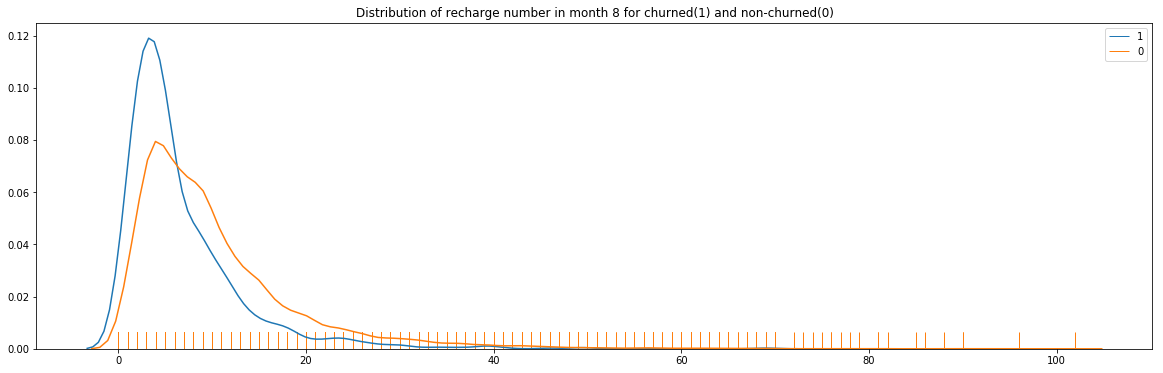

In [51]:
compare_churn_and_non_churn(filtered_data,'churn','total_rech_num_8','Distribution of recharge number in month 8 for churned(1) and non-churned(0)')

- Conclusion: Number of total recharges for month 8 is more right skewed for  non churned customers. We can see similar observations for month 6 and 7.

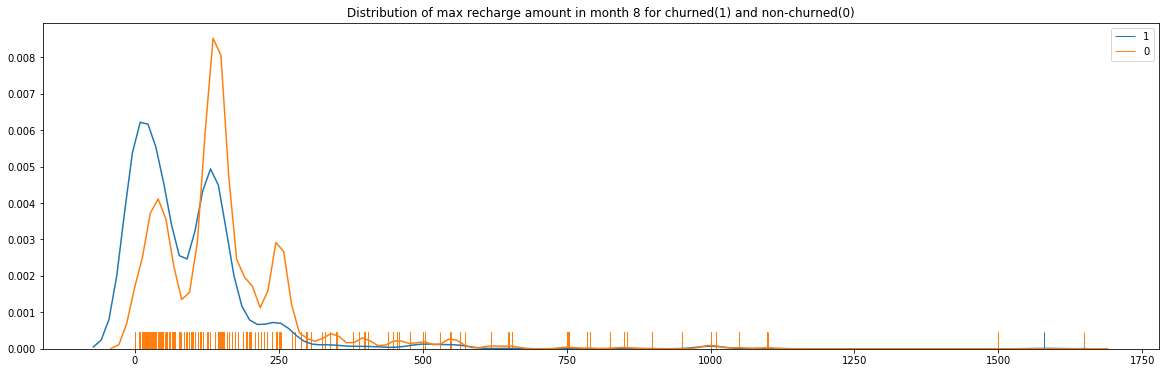

In [52]:
compare_churn_and_non_churn(filtered_data,'churn','max_rech_amt_8','Distribution of max recharge amount in month 8 for churned(1) and non-churned(0)')

- Conclusion: Maximum recharge amount for month 8 is more for non churned customers. We can see similar observations for month 6 and 7.

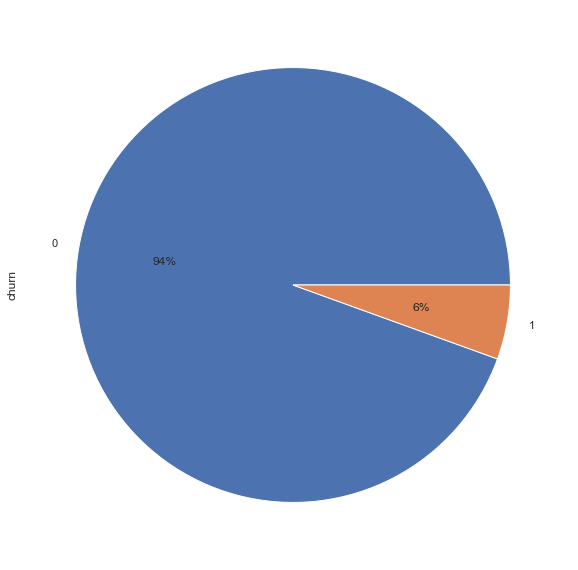

In [53]:
ax = univariate_categorical_plot(df=filtered_data, col='churn',style=0)

Only 6% of complete data is churn data. Rest 94% is non-churn.

In [54]:
avg_rech_amt_churn=(churn_df['total_rech_amt_6']+churn_df['total_rech_amt_7']+churn_df['total_rech_amt_8'])/3
churn_df['avg_rech_amt_ranges'] = avg_rech_amt_churn.apply(lambda x: get_category(x,-1,10000,500))

avg_rech_amt_non_churn=(non_churn_df['total_rech_amt_6']+non_churn_df['total_rech_amt_7']+non_churn_df['total_rech_amt_8'])/3
non_churn_df['avg_rech_amt_ranges'] = avg_rech_amt_non_churn.apply(lambda x: get_category(x,-1,10000,500))


avg_arpu_churn=(churn_df['arpu_6']+churn_df['arpu_7']+churn_df['arpu_8'])/3


avg_arpu_non_churn=(non_churn_df['arpu_6']+non_churn_df['arpu_7']+non_churn_df['arpu_8'])/3


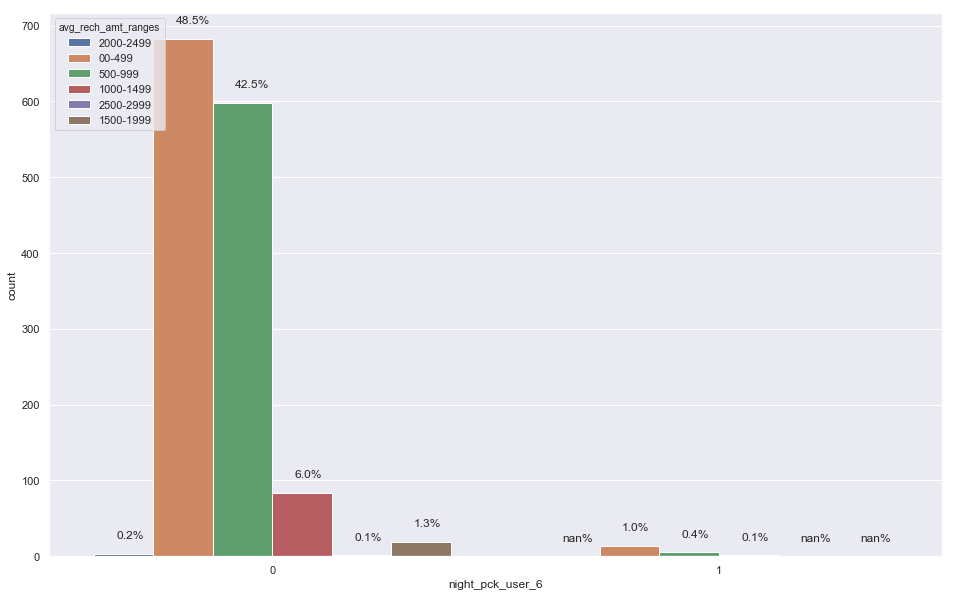

In [55]:
ax = univariate_categorical_plot(df=churn_df, col='night_pck_user_6',hue='avg_rech_amt_ranges')

__Conclusion:__
- For a non night pack user for 6th month the average recharge is more for brackets 0-500 and 501-1000
- For night pack user, average recharge is more for bracket 1-500
- So, night pack users regular recharge is very less compared to non night pack users

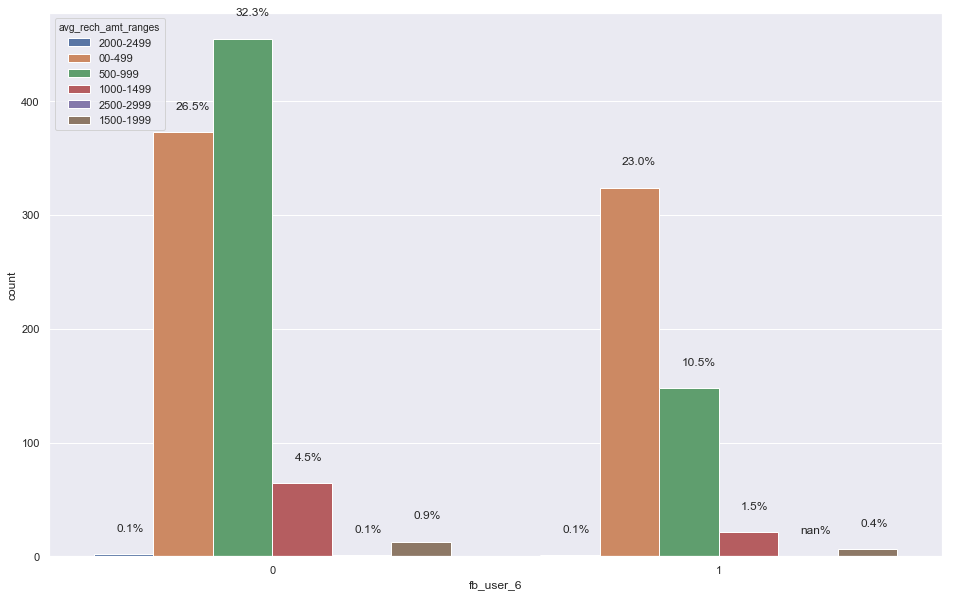

In [56]:
ax = univariate_categorical_plot(df=churn_df, col='fb_user_6',hue='avg_rech_amt_ranges')

__Conclusion:__ 
- For churned non fb user in 6th month the avg rehcarge amount is more for bracket 501-1000
- For churned fb user in 6th month the avg rehcarge amount is more for bracket 1-500
- Fb users do less number of recharges compareed to non fb users

## 2.3 Bivariate Analysis

### 2.3.1 Average revenue per customer vs Average recharge for churned and non-churned

In [57]:
filtered_data['avg_rech_amt']=(filtered_data['total_rech_amt_6']+filtered_data['total_rech_amt_7']+filtered_data['total_rech_amt_8'])/3
filtered_data['avg_rech_amt_ranges'] = filtered_data['avg_rech_amt'].apply(lambda x: get_category(x,0,10000,1000))

In [58]:
filtered_data['avg_arpu']=(filtered_data['arpu_6']+filtered_data['arpu_7']+filtered_data['arpu_8'])/3
filtered_data['avg_arpu_ranges'] = filtered_data['avg_arpu'].apply(lambda x: get_category(x,-3000,5000,1000))

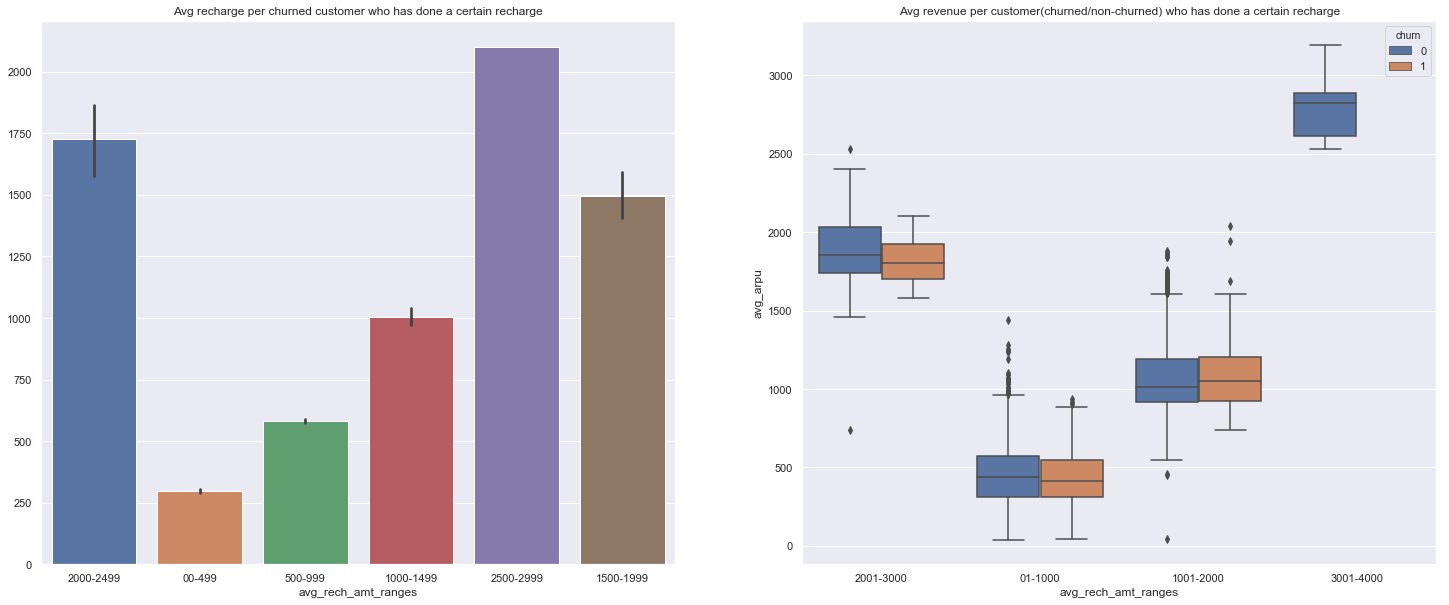

In [59]:
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='avg_rech_amt_ranges', y=avg_arpu_churn, data=churn_df)
plt.title("Avg recharge per churned customer who has done a certain recharge")
plt.subplot(1, 2, 2)
sns.boxplot(x='avg_rech_amt_ranges', y='avg_arpu', hue='churn', data=filtered_data)
plt.title("Avg revenue per customer(churned/non-churned) who has done a certain recharge")
plt.show()

__Conclusion:__
- For a churned customers, the average revenue is almost negligible after 3000 recharge
- For a churned customer the average recharges are high for higher bracket recharges.

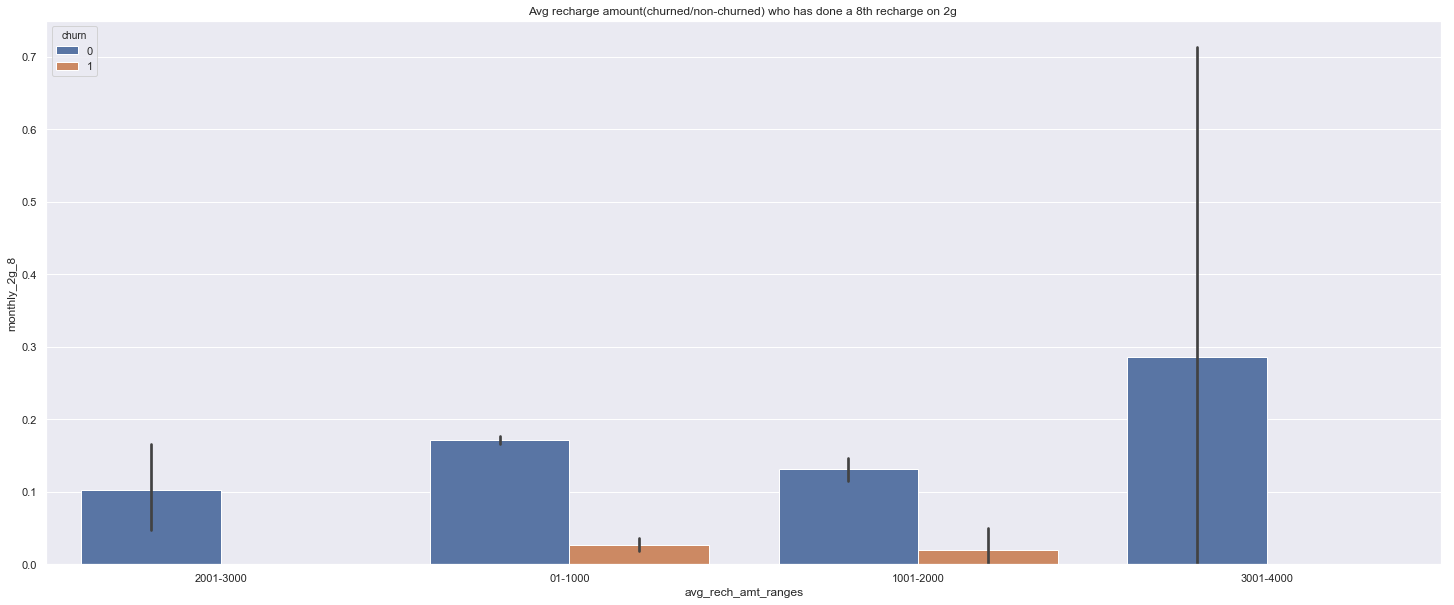

In [60]:
plt.figure(figsize=(25, 10))


sns.barplot(x='avg_rech_amt_ranges', y='monthly_2g_8', hue='churn', data=filtered_data)
plt.title("Avg recharge amount(churned/non-churned) who has done a 8th recharge on 2g ")
plt.show()

- In 8the month recharge on 2g is almost negligible for churned customer who have average recharge more than 2000 
- This shows that customers who churned are not doing much 2g recharge in last month(action phase)


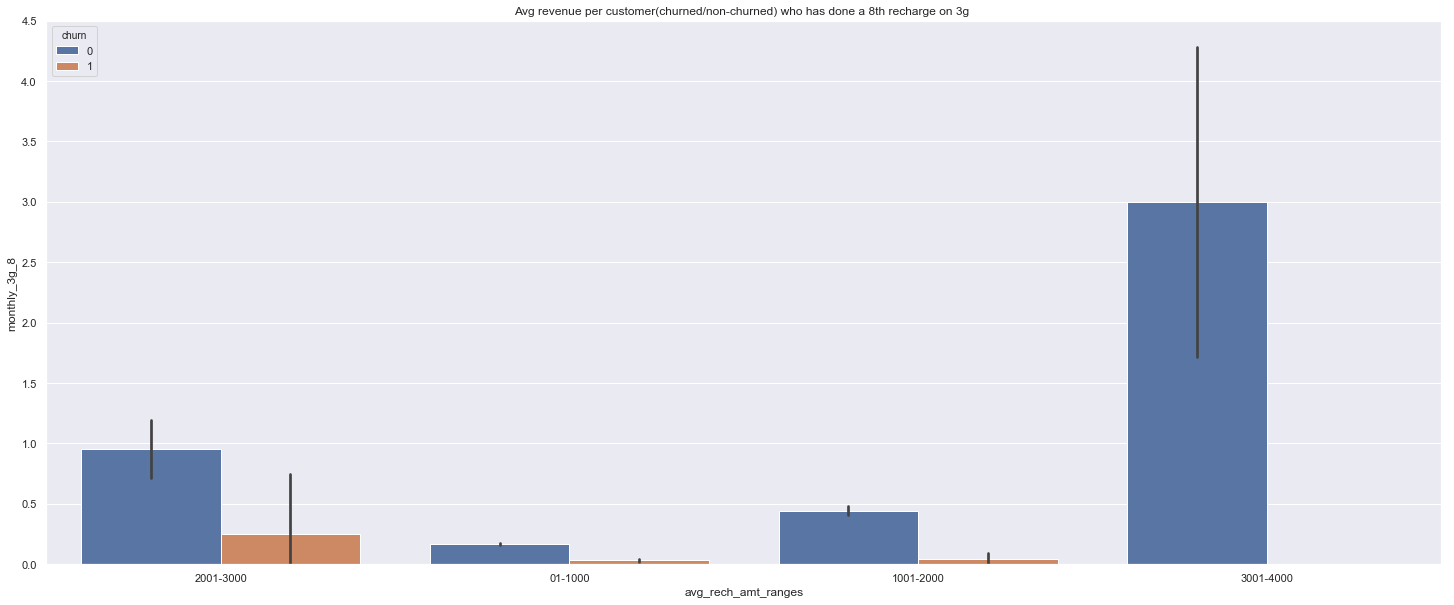

In [61]:
plt.figure(figsize=(25, 10))


sns.barplot(x='avg_rech_amt_ranges', y='monthly_3g_8', hue='churn', data=filtered_data)
plt.title("Avg revenue per customer(churned/non-churned) who has done a 8th recharge on 3g ")
plt.show()

__Conclusion:__
- There are no Churned customers above 3000 bracket avg amt recharges who have done 3g recharge.
- This shows that customers who churned are not doing much 3g recharge in last month(action phase)

### 2.3.1 Churn Ratio with respect to variable 'arpu_6', arpu_7' and 'arpu_8' 

<Figure size 960x480 with 0 Axes>

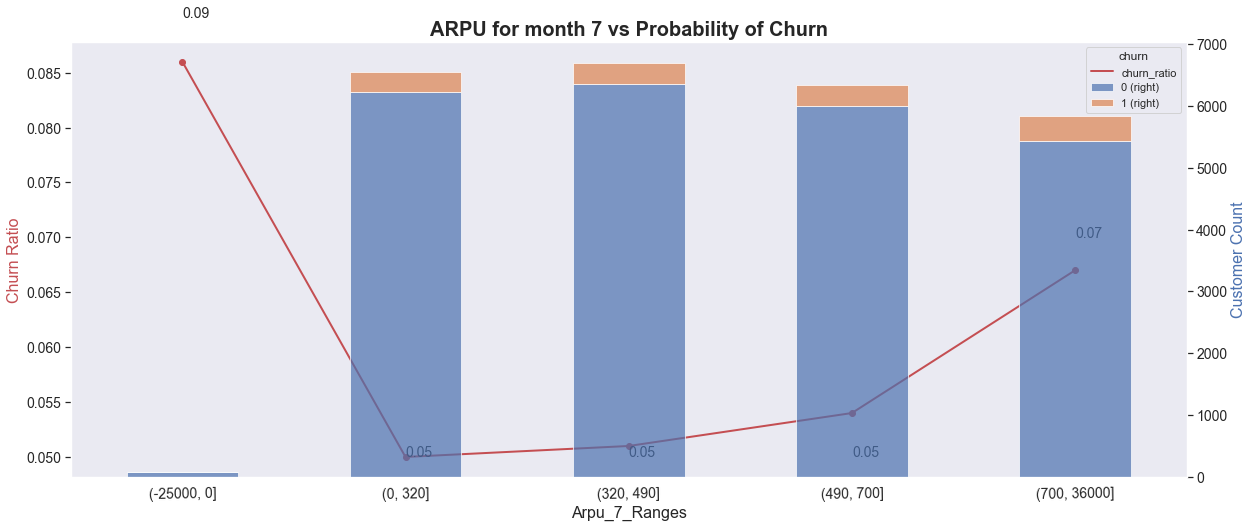

In [62]:
bins = pd.IntervalIndex.from_tuples([(-25000, 0), (0, 320), (320, 490), (490, 700), (700,36000)])
filtered_data['arpu_7_ranges'] = pd.cut(filtered_data['arpu_7'], bins)
plot_churner_percentage(filtered_data, 'arpu_7_ranges', 'ARPU for month 7')
filtered_data = filtered_data.drop(['arpu_7_ranges'],axis=1)

For month 6 and 7 revenue, highest revenue customers and lowest revenue customers churned more than others

<Figure size 960x480 with 0 Axes>

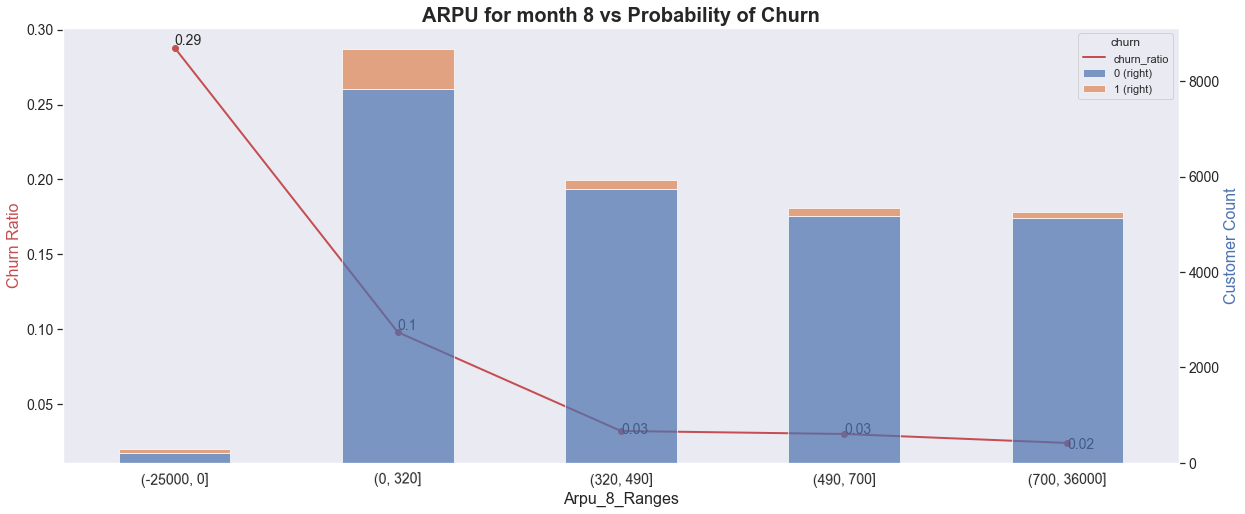

In [63]:
bins = pd.IntervalIndex.from_tuples([(-25000, 0), (0, 320), (320, 490), (490, 700), (700,36000)])
filtered_data['arpu_8_ranges'] = pd.cut(filtered_data['arpu_8'], bins)
plot_churner_percentage(filtered_data, 'arpu_8_ranges', 'ARPU for month 8')
filtered_data = filtered_data.drop(['arpu_8_ranges'],axis=1)

We see that in month 8, customers with lowest average revenue churned off more probably because they have moved from __good__ to __action__ phase.
Let's calculate the drop in average revenue and plot the churn ratio.

<Figure size 960x480 with 0 Axes>

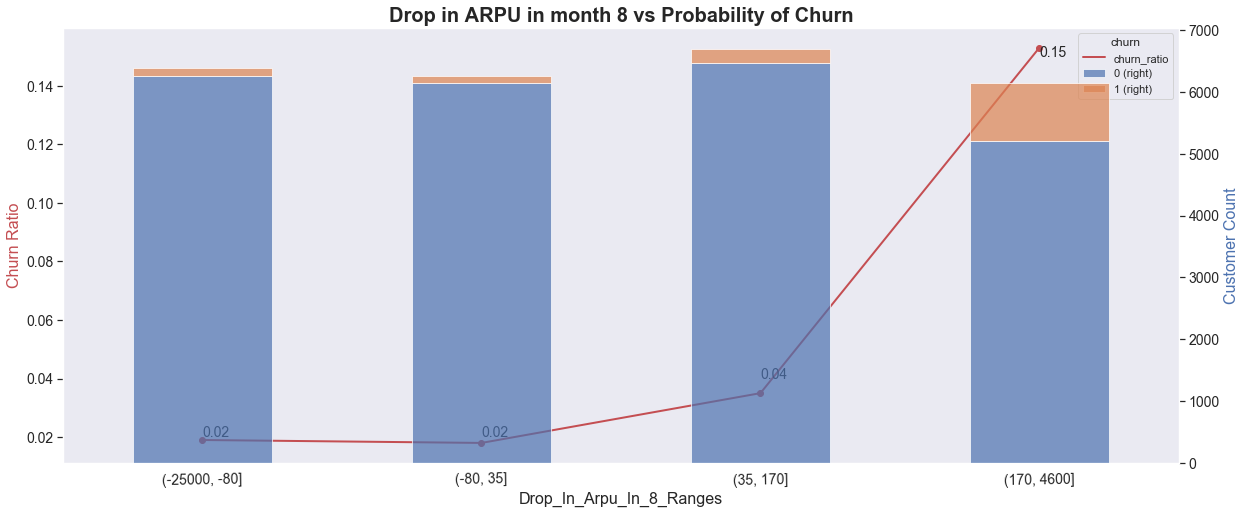

In [64]:
filtered_data['drop_in_arpu_in_8'] = (filtered_data['arpu_6'] + filtered_data['arpu_7'])/2 - filtered_data['arpu_8']
bins = pd.IntervalIndex.from_tuples([(-25000, -80), (-80, 35), (35, 170), (170, 4600)])
filtered_data['drop_in_arpu_in_8_ranges'] = pd.cut(filtered_data['drop_in_arpu_in_8'], bins)
plot_churner_percentage(filtered_data, 'drop_in_arpu_in_8_ranges','Drop in ARPU in month 8')
filtered_data = filtered_data.drop(['drop_in_arpu_in_8_ranges','drop_in_arpu_in_8'],axis=1)

As predicted earlier, when arpu for montyh 8 dropped,churn ratio increased.

### 2.3.2 Churn Ratio with respect to variable minutes of usage

<Figure size 960x480 with 0 Axes>

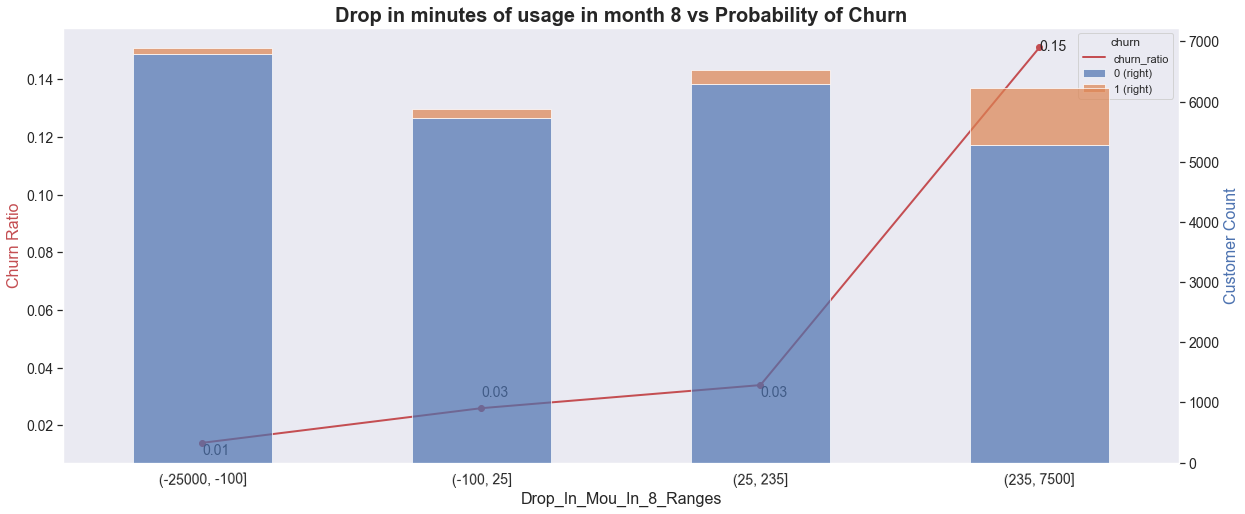

In [65]:
filtered_data['total_mou_6'] = filtered_data['total_ic_mou_6']+filtered_data['total_og_mou_6']
filtered_data['total_mou_7'] = filtered_data['total_ic_mou_7']+filtered_data['total_og_mou_7']
filtered_data['total_mou_8'] = filtered_data['total_ic_mou_8']+filtered_data['total_og_mou_8']
filtered_data['drop_in_mou_in_8'] = (filtered_data['total_mou_6'] + filtered_data['total_mou_7'])/2 - filtered_data['total_mou_8']
bins = pd.IntervalIndex.from_tuples([(-25000, -100), (-100, 25), (25, 235), (235, 7500)])
filtered_data['drop_in_mou_in_8_ranges'] = pd.cut(filtered_data['drop_in_mou_in_8'], bins)
plot_churner_percentage(filtered_data, 'drop_in_mou_in_8_ranges', 'Drop in minutes of usage in month 8')
filtered_data = filtered_data.drop(['drop_in_mou_in_8_ranges','drop_in_mou_in_8','total_mou_6','total_mou_7','total_mou_8'],axis=1)

More the drop in minutes of usage in month 8, more is churn ratio.

So we can conclude that drop in average revenue per user and minutes of usage impact churn ratio.

In [66]:
#Drop features created for EDA
filtered_data = filtered_data.drop(['avg_rech_amt_ranges','avg_arpu_ranges'],axis=1)

In [67]:
#Clean dataframes craeted for EDA
del churn_df
del non_churn_df

# 3. Derive new features

As seen in EDA, drop in arpu and mou show churn prediction so adding these 2 derived features

In [68]:
filtered_data['drop_in_arpu_8'] = (filtered_data['arpu_6'] + filtered_data['arpu_7'])/2 - filtered_data['arpu_8']
filtered_data['drop_in_mou_8'] = (filtered_data['total_ic_mou_6']+filtered_data['total_og_mou_6'] + filtered_data['total_ic_mou_7']+filtered_data['total_og_mou_7'])/2 - filtered_data['total_ic_mou_8']-filtered_data['total_og_mou_8']

In [69]:
#Check if fb usage stopped in month 8
filtered_data['fb_stopped_in_8'] = np.where((filtered_data['fb_user_8']==0) & (filtered_data['fb_user_6']==1) & (filtered_data['fb_user_7']==1) , 1, 0)

# 4. Modelling

Objectives: 

1) whether a high-value customer will churn or not, in near future (i.e. churn phase)


2)  identify important variables that are strong predictors of churn

3) Since we want to find the Churned customers accurately, we will use evaluation metric __Sensitivity/recall__ in all our models

## 4.1 Splitting the Data into Training and Testing Sets 

In [70]:
# Putting feature variable to X
X = filtered_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = filtered_data['churn']

In [71]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

## 4.2 Rescaling the features
We will use MinMax scaling.

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#### Excluding categorical columns to avoid scaling

Categorical:
_night_pck_user_6
_night_pck_user_7
_night_pck_user_8
_fb_user_6
_fb_user_7
_fb_user_8
_churn

In [73]:
categorical=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','week_of_last_rech_8','week_of_last_rech_7','week_of_last_rech_6','churn']
numerical=[col for col in X_train if col not in categorical]

In [74]:
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_train.describe()

arpu_6               arpu_7               arpu_8  \
count            17,850.00            17,850.00            17,850.00   
mean                  0.25                 0.31                 0.21   
std                   0.09                 0.07                 0.09   
min                   0.00                 0.00                 0.00   
25%                   0.19                 0.26                 0.15   
50%                   0.24                 0.30                 0.20   
75%                   0.29                 0.34                 0.25   
max                   1.00                 1.00                 1.00   

               onnet_mou_6          onnet_mou_7          onnet_mou_8  \
count            17,850.00            17,850.00            17,850.00   
mean                  0.05                 0.06                 0.05   
std                   0.08                 0.09                 0.09   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.02                 0.02                 0.02   
75%                   0.06                 0.06                 0.05   
max                   1.00                 1.00                 1.00   

              offnet_mou_6         offnet_mou_7         offnet_mou_8  \
count            17,850.00            17,850.00            17,850.00   
mean                  0.07                 0.07                 0.06   
std                   0.09                 0.09                 0.08   
min                   0.00                 0.00                 0.00   
25%                   0.01                 0.01                 0.01   
50%                   0.04                 0.04                 0.04   
75%                   0.09                 0.09                 0.08   
max                   1.00                 1.00                 1.00   

             roam_ic_mou_6         ...           total_data_rech_amt_8  \
count            17,850.00         ...                       17,850.00   
mean                  0.02         ...                            0.03   
std                   0.06         ...                            0.08   
min                   0.00         ...                            0.00   
25%                   0.00         ...                            0.00   
50%                   0.00         ...                            0.00   
75%                   0.00         ...                            0.03   
max                   1.00         ...                            1.00   

                  avg_rech  week_of_last_rech_6  week_of_last_rech_7  \
count            17,850.00            17,850.00            17,850.00   
mean                  0.06                 4.29                 4.43   
std                   0.08                 0.82                 0.74   
min                   0.00                 0.00                 0.00   
25%                   0.01                 4.00                 4.00   
50%                   0.03                 4.00                 5.00   
75%                   0.07                 5.00                 5.00   
max                   1.00                 5.00                 5.00   

       week_of_last_rech_8         avg_rech_amt             avg_arpu  \
count            17,850.00            17,850.00            17,850.00   
mean                  4.28                 0.15                 0.15   
std                   0.94                 0.09                 0.09   
min                   0.00                 0.00                 0.00   
25%                   4.00                 0.09                 0.09   
50%                   4.00                 0.14                 0.14   
75%                   5.00                 0.19                 0.19   
max                   5.00                 1.00                 1.00   

            drop_in_arpu_8        drop_in_mou_8      fb_stopped_in_8  
count            17,850.00           

In [75]:
#Scale test data as well
X_test[numerical] = scaler.transform(X_test[numerical])
X_test.describe()

arpu_6               arpu_7               arpu_8  \
count             7,650.00             7,650.00             7,650.00   
mean                  0.25                 0.31                 0.21   
std                   0.09                 0.07                 0.09   
min                  -0.12                 0.04                 0.09   
25%                   0.19                 0.26                 0.15   
50%                   0.24                 0.30                 0.20   
75%                   0.29                 0.34                 0.25   
max                   0.87                 1.10                 1.01   

               onnet_mou_6          onnet_mou_7          onnet_mou_8  \
count             7,650.00             7,650.00             7,650.00   
mean                  0.05                 0.06                 0.05   
std                   0.08                 0.09                 0.09   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.02                 0.02                 0.02   
75%                   0.06                 0.06                 0.05   
max                   0.89                 0.83                 1.00   

              offnet_mou_6         offnet_mou_7         offnet_mou_8  \
count             7,650.00             7,650.00             7,650.00   
mean                  0.07                 0.07                 0.06   
std                   0.09                 0.09                 0.08   
min                   0.00                 0.00                 0.00   
25%                   0.02                 0.01                 0.01   
50%                   0.04                 0.04                 0.04   
75%                   0.10                 0.09                 0.08   
max                   0.97                 0.94                 0.90   

             roam_ic_mou_6         ...           total_data_rech_amt_8  \
count             7,650.00         ...                        7,650.00   
mean                  0.02         ...                            0.03   
std                   0.07         ...                            0.08   
min                   0.00         ...                            0.00   
25%                   0.00         ...                            0.00   
50%                   0.00         ...                            0.00   
75%                   0.00         ...                            0.03   
max                   0.97         ...                            0.97   

                  avg_rech  week_of_last_rech_6  week_of_last_rech_7  \
count             7,650.00             7,650.00             7,650.00   
mean                  0.06                 4.29                 4.46   
std                   0.08                 0.81                 0.73   
min                   0.00                 0.00                 0.00   
25%                   0.01                 4.00                 4.00   
50%                   0.03                 4.00                 5.00   
75%                   0.07                 5.00                 5.00   
max                   0.95                 5.00                 5.00   

       week_of_last_rech_8         avg_rech_amt             avg_arpu  \
count             7,650.00             7,650.00             7,650.00   
mean                  4.28                 0.15                 0.15   
std                   0.93                 0.09                 0.09   
min                   0.00                -0.01                 0.00   
25%                   4.00                 0.09                 0.09   
50%                   4.00                 0.14                 0.13   
75%                   5.00                 0.19                 0.19   
max                   5.00                 0.91                 0.91   

            drop_in_arpu_8        drop_in_mou_8      fb_stopped_in_8  
count             7,650.00           

## 4.3 Handle Class imbalance

In [76]:
print("Percentage of churn observations:", y_train.sum()*100/y_train.shape[0])

Percentage of churn observations: 5.591036414565826


Only ~5.6% data is churn data so we need to balance the classes

In [77]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(33704, 142)
(33704,)


16852

In [78]:
print("Percentage of churn observations after handling class imbalance: ", y_tr.sum()*100/y_tr.shape[0])
print("Train data size before applying smote: ", X_train.shape)
print("Train data size after applying smote: ", X_tr.shape)

Percentage of churn observations after handling class imbalance:  50.0
Train data size before applying smote:  (17850, 142)
Train data size after applying smote:  (33704, 142)


## 4.4 Run first training model-Logistic Regression

In [79]:
import statsmodels.api as sm

In [80]:
# Logistic regression model
X_tr_sm = sm.add_constant(X_tr)
logm1 = sm.GLM(y_tr,X_tr_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                33704
Model:                            GLM   Df Residuals:                    33568
Model Family:                Binomial   Df Model:                          135
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12384.
Date:                Sun, 18 Aug 2019   Deviance:                       24768.
Time:                        22:02:05   Pearson chi2:                 8.22e+04
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.203e+04   3129.162    -10.237      0.000   -3.82e+04   -2.59e+04
x1          1261.0586    123.267     10.230      0.000    1019.461    1502.656
x2          1605.1699    156.553     10.253      0.000    1298.332    1912.008
x3         -7702.3939    752.751    -10.232      0.000   -9177.758   -6227.030
x4          -107.5024     36.996     -2.906      0.004    -180.013     -34.992
x5           -61.2849     23.409     -2.618      0.009    -107.166     -15.403
x6           117.4144     27.372      4.290      0.000      63.766     171.063
x7           -90.8616     37.299     -2.436      0.015    -163.966     -17.758
x8           -66.4230     25.151     -2.641      0.008    -115.718     -17.127
x9           104.3843     29.417      3.548      0.000      46.729     162.040
x10           -2.0664      0.539     -3.835      0.000      -3.122      -1.010
x11            2.3364      0.475      4.918      0.000       1.405       3.268
x12           -1.4637      0.434     -3.372      0.001      -2.314      -0.613
x13           24.0267      8.950      2.685      0.007       6.486      41.568
x14           12.1387      4.585      2.647      0.008       3.152      21.126
x15          -15.8629      4.887     -3.246      0.001     -25.442      -6.284
x16         1.878e+04   8020.771      2.341      0.019    3059.520    3.45e+04
x17        -2.807e+04   7657.757     -3.665      0.000   -4.31e+04   -1.31e+04
x18         3.011e+04   6554.078      4.595      0.000    1.73e+04     4.3e+04
x19         1.961e+04   8378.730      2.340      0.019    3186.440     3.6e+04
x20        -3.264e+04   8902.199     -3.666      0.000   -5.01e+04   -1.52e+04
x21         4.086e+04   8890.370      4.596      0.000    2.34e+04    5.83e+04
x22         1645.4882    702.429      2.343      0.019     268.752    3022.224
x23        -2430.1716    662.025     -3.671      0.000   -3727.717   -1132.626
x24         2977.1168    647.518      4.598      0.000    1708.004    4246.229
x25           -1.0849      0.309     -3.507      0.000      -1.691      -0.479
x26           -0.6135      0.365     -1.683      0.092      -1.328       0.101
x27            0.8437      0.359      2.352      0.019       0.141       1.547
x28        -4.121e+04   1.25e+04     -3.291      0.001   -6.58e+04   -1.67e+04
x29        -3.533e+04   1.44e+04     -2.449      0.014   -6.36e+04   -7054.198
x30         1.365e+04   1.26e+04      1.081      0.280   -1.11e+04    3.84e+04
x31         2.052e+04   1.87e+04      1.098      0.272   -1.61e+04    5.71e+04
x32        -1.051e+05   1.94e+04     -5.424      0.000   -1.43e+05   -6.71e+04
x33        -4.453e+04   2.03e+04     -2.192      0.028   -8.44e+04   -4716.018
x34         1.969e+04   1.79e+04      1.098      0.272   -1.55e+04    5.49e+04
x35        -1.064e+05   1.96e+04     -5.424      0.000   -1.45e+05   -6.79e+04
x36        -4.449e+04   2.03e+04     -2.191      0.028   -8.43e+04   -4695.834
x3

In [81]:
#Make predictions
y_train_pred = res.predict(X_tr_sm)
y_train_pred[:10]

array([0.11944557, 0.99473561, 0.17784613, 0.24459004, 0.01668664,
       0.02391327, 0.17130848, 0.84363099, 0.09956882, 0.73727752])

In [82]:
y_train_pred_final = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn           Churn_Prob  predicted
0      0                 0.12          0
1      1                 0.99          1
2      0                 0.18          0
3      0                 0.24          0
4      0                 0.02          0

In [83]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

[[14148  2704]
 [ 2209 14643]]
Accuracy of train data: 0.8542309518158082
Recall of train data: 0.8689176358889152


In [84]:
#Make predictions on test data
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

12067                   0.18
5991                    0.19
37287                   0.42
29754                   0.01
24501                   0.08
23191                   0.69
80419                   0.93
11557                   0.03
36632                   0.00
3336                    0.63
dtype: float64

In [85]:
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final.head()
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

Churn           Churn_Prob  predicted
12067      0                 0.18          0
5991       0                 0.19          0
37287      0                 0.42          0
29754      0                 0.01          0
24501      0                 0.08          0

In [86]:
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print("Recall of test data:", metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

[[5972 1268]
 [  91  319]]
Accuracy of test data: 0.8223529411764706
Recall of test data: 0.7780487804878049


In [87]:
#Other metrics for test data
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("False Positive Rate:", FP/ float(TN+FP))
print("Positive Predictive Value :", TP / float(TP+FP))
print("Negative Predictive Value :", TN / float(TN+FN))

Sensitivity: 0.7780487804878049
Specificity: 0.8248618784530387
False Positive Rate: 0.17513812154696132
Positive Predictive Value : 0.2010081915563957
Negative Predictive Value : 0.9849909285832096


## 4.5 Correlation Matrix

In [88]:
# Let's see the correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,10)) 
#sns.heatmap(X_train.corr(),annot = True)
X_train.corr()

arpu_6               arpu_7  \
arpu_6                                1.00                 0.61   
arpu_7                                0.61                 1.00   
arpu_8                                0.53                 0.68   
onnet_mou_6                           0.46                 0.31   
onnet_mou_7                           0.30                 0.45   
onnet_mou_8                           0.26                 0.38   
offnet_mou_6                          0.60                 0.43   
offnet_mou_7                          0.40                 0.61   
offnet_mou_8                          0.35                 0.50   
roam_ic_mou_6                         0.12                 0.10   
roam_ic_mou_7                         0.11                 0.11   
roam_ic_mou_8                         0.11                 0.11   
roam_og_mou_6                         0.18                 0.14   
roam_og_mou_7                         0.14                 0.15   
roam_og_mou_8                         0.14                 0.15   
loc_og_t2t_mou_6                      0.26                 0.18   
loc_og_t2t_mou_7                      0.20                 0.26   
loc_og_t2t_mou_8                      0.19                 0.22   
loc_og_t2m_mou_6                      0.44                 0.30   
loc_og_t2m_mou_7                      0.34                 0.42   
loc_og_t2m_mou_8                      0.31                 0.35   
loc_og_t2f_mou_6                      0.20                 0.14   
loc_og_t2f_mou_7                      0.16                 0.17   
loc_og_t2f_mou_8                      0.16                 0.16   
loc_og_t2c_mou_6                      0.07                 0.01   
loc_og_t2c_mou_7                     -0.00                 0.05   
loc_og_t2c_mou_8                      0.02                 0.03   
loc_og_mou_6                          0.45                 0.31   
loc_og_mou_7                          0.36                 0.44   
loc_og_mou_8                          0.32                 0.37   
...                                    ...                  ...   
monthly_2g_7                         -0.10                -0.05   
monthly_2g_8                         -0.06                -0.07   
sachet_2g_6                          -0.22                -0.26   
sachet_2g_7                          -0.26                -0.23   
sachet_2g_8                          -0.22                -0.21   
monthly_3g_6                          0.18                 0.07   
monthly_3g_7                          0.07                 0.18   
monthly_3g_8                          0.10                 0.12   
sachet_3g_6                          -0.05                -0.09   
sachet_3g_7                          -0.09                -0.05   
sachet_3g_8                          -0.07                -0.06   
fb_user_6                            -0.17                -0.27   
fb_user_7                            -0.25                -0.18   
fb_user_8                            -0.18                -0.17   
aon                                   0.07                 0.05   
aug_vbc_3g                            0.04                 0.04   
jul_vbc_3g                            0.03                 0.06   
jun_vbc_3g                            0.09                 0.01   
total_data_rech_amt_6                -0.01                -0.14   
total_data_rech_amt_7                -0.14                -0.02   
total_data_rech_amt_8                -0.09                -0.07   
avg_rech                              0.28                 0.29   
week_of_last_rech_6                   0.22                 0.16   
week_of_last_rech_7                   0.05                 0.21   
week_of_last_rech_8                   0.08                 0.14   
avg_rech_amt                          0.81                 0.88   
avg_arpu                              0.82                 0.89   
drop_in_arpu_8                        0.31                 0.10   
drop_in_mou_8   

<Figure size 1440x720 with 0 Axes>

Even though we got decent result (82% accuracy and 78% recall) from logistic regression on entire data set, as seen in correlation matrix, there are many correlated features. One way to handle this is by reducing the number of features by PCA. PCA will create non-correlated features.

## 4.6 PCA on the data

- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

### 4.6.1 Perform PCA

In [89]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [90]:
#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

### 4.6.2 plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [91]:
pca.components_

array([[-8.33546811e-03, -9.86384644e-03, -2.37045872e-02, ...,
         1.25505767e-02,  7.71797514e-03,  5.38396619e-02],
       [-3.23421903e-02, -2.66587056e-02, -1.42807785e-03, ...,
        -2.59330545e-02, -2.75034656e-02,  3.68152419e-02],
       [ 2.24736999e-02, -3.36225147e-03, -9.26921492e-03, ...,
         1.57407970e-02,  1.84753512e-02, -7.74621340e-02],
       ...,
       [ 0.00000000e+00, -8.96343927e-17,  4.81071671e-07, ...,
         3.59884666e-07, -5.00430103e-06, -1.62490863e-18],
       [-0.00000000e+00,  7.25018994e-17,  2.03805479e-07, ...,
         1.52464740e-07,  7.46851666e-07,  6.99806379e-19],
       [ 4.07478225e-01,  5.17561991e-01, -1.67232161e-01, ...,
        -4.55626931e-01, -2.66294149e-03, -2.78423118e-16]])

In [92]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head()

PC1                  PC2                  PC3      Feature
0                -0.01                -0.03                 0.02       arpu_6
1                -0.01                -0.03                -0.00       arpu_7
2                -0.02                -0.00                -0.01       arpu_8
3                -0.01                -0.04                 0.02  onnet_mou_6
4                -0.01                -0.04                 0.01  onnet_mou_7

### 4.6.3 Look at the screeplot to assess the number of needed principal components

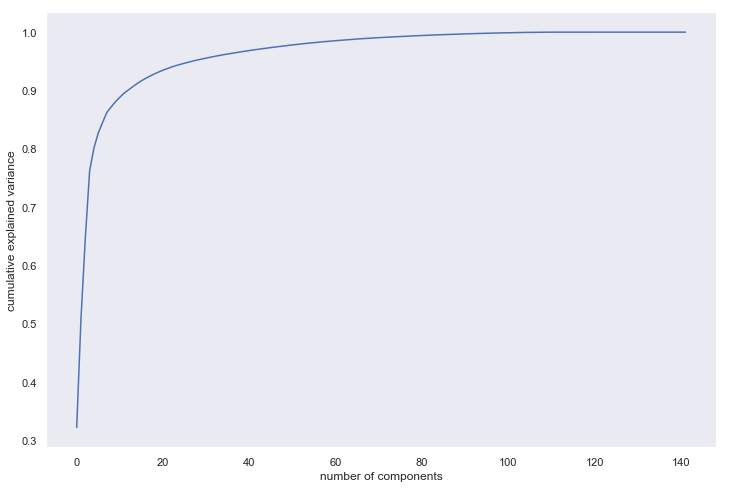

In [93]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like ~54 components are enough to describe 98% of the variance in the dataset
- Let's choose number of features describing 98% of variance

In [94]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
#pca_final = IncrementalPCA(n_components=30)
pca_final = PCA(0.98)

### 4.6.4 Basis transformation - getting the data onto our PCs

In [95]:
df_tr_pca = pca_final.fit_transform(X_tr)
df_tr_pca.shape

(33704, 54)

We are using 54 features for further analysis

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [96]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_tr_pca.transpose())

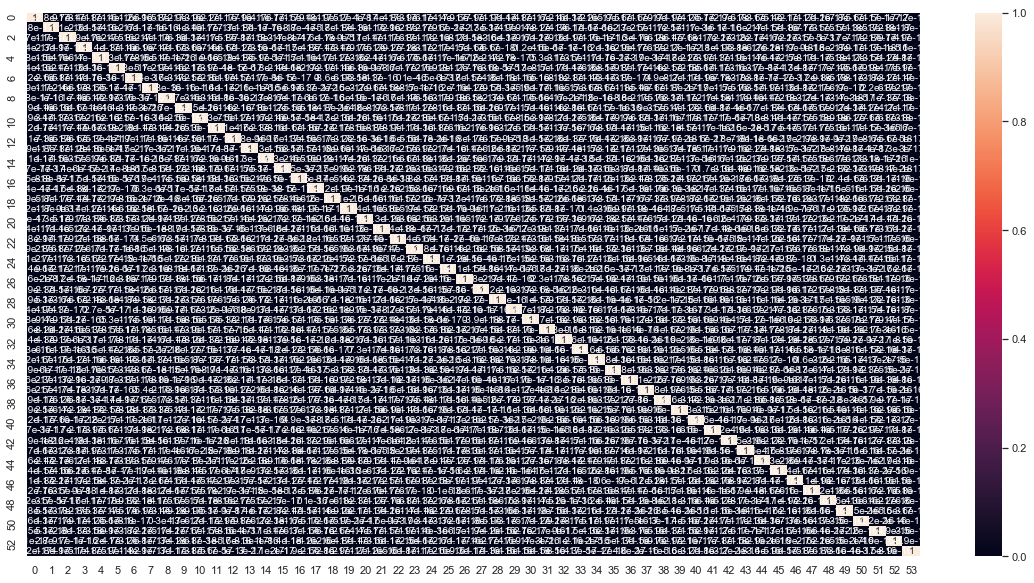

In [97]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [98]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.2562667359146456e-15 , min corr:  -1.0350385489664968e-15


We have effectively removed multicollinearity from our situation, and our models will be much more stable

In [99]:
#Applying selected components to the test data - 60 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7650, 54)

### 4.6.5 Apply logistic regression on our Principal Components

#### 4.6.5.1 Train model on training data

In [100]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca_1 = learner_pca.fit(df_tr_pca,y_tr)

In [101]:
#Making prediction on the test data
pred_probs_test = model_pca_1.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

#### 4.6.5.2 Make predictions

In [102]:
#Make predictions
y_train_pred_1 = model_pca_1.predict_proba(df_tr_pca)[:,1]
y_test_pred_1 = model_pca_1.predict_proba(df_test_pca)[:,1]

In [103]:
y_train_pred_1 = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_pred_1})
y_train_pred_1.head()
y_train_pred_1['predicted'] = y_train_pred_1.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_1 = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred_1})
y_test_pred_1.head()
y_test_pred_1['predicted'] = y_test_pred_1.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_pred_1.head()

Churn           Churn_Prob  predicted
12067      0                 0.20          0
5991       0                 0.27          0
37287      0                 0.36          0
29754      0                 0.01          0
24501      0                 0.30          0

#### 4.6.5.3 Model Evaluation

In [104]:
confusion_test_1 = metrics.confusion_matrix(y_test_pred_1.Churn, y_test_pred_1.predicted )
print(confusion_test_1)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_1.Churn, y_test_pred_1.predicted))
print("Recall of test data:",metrics.recall_score(y_test_pred_1.Churn, y_test_pred_1.predicted))
confusion_train_1 = metrics.confusion_matrix(y_train_pred_1.Churn, y_train_pred_1.predicted )
print(confusion_train_1)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_1.Churn, y_train_pred_1.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_1.Churn, y_train_pred_1.predicted))

[[5925 1315]
 [  86  324]]
Accuracy of test data: 0.8168627450980392
Recall of test data: 0.7902439024390244
[[13970  2882]
 [ 2453 14399]]
Accuracy of train data: 0.841710182767624
Recall of train data: 0.8544386422976501


OBSERVATIONS

1. Data is higly imbalanced only 5.6% data is churn & remaining is non_churn
2. SMOTE is applied to balance data
3. ~82% accuracy and 79% recall on test data obtained with Logistic regresision on PCA features explaining 98% variance
4. 97% variance can be explained with 54 features and maintain 79% accuracy

#### 4.6.5.4 Hyper-parameter tuning

Let's perform GridSearchCV to tune our model

In [105]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'C': [0.001,0.01,0.1,1,10,100,1000,10000]}]


# step-3: perform grid search
# 3.1 specify model
lm = LogisticRegression()     

# 3.2 call GridSearchCV() with scoring=recall because Sensitivity is important in our case
model_cv = GridSearchCV(lm, hyper_params,scoring='recall', cv=folds, verbose=0, return_train_score=True)      

# fit the model
model_cv.fit(df_tr_pca,y_tr)           

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=0)

In [106]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time         std_fit_time      mean_score_time  \
0                 0.78                 0.10                 0.05   
1                 1.21                 0.14                 0.03   
2                 1.11                 0.14                 0.01   
3                 1.68                 0.08                 0.02   
4                 1.59                 0.05                 0.01   
5                 1.50                 0.06                 0.01   
6                 1.70                 0.08                 0.01   
7                 1.64                 0.08                 0.01   

        std_score_time              param_C        params  \
0                 0.04                 0.00  {'C': 0.001}   
1                 0.03                 0.01   {'C': 0.01}   
2                 0.00                 0.10    {'C': 0.1}   
3                 0.00                    1      {'C': 1}   
4                 0.00                   10     {'C': 10}   
5                 0.01                  100    {'C': 100}   
6                 0.00                 1000   {'C': 1000}   
7                 0.00                10000  {'C': 10000}   

     split0_test_score    split1_test_score    split2_test_score  \
0                 0.79                 0.79                 0.79   
1                 0.81                 0.82                 0.82   
2                 0.85                 0.84                 0.85   
3                 0.85                 0.85                 0.86   
4                 0.85                 0.85                 0.86   
5                 0.85                 0.85                 0.86   
6                 0.85                 0.85                 0.86   
7                 0.85                 0.85                 0.86   

     split3_test_score         ...               mean_test_score  \
0                 0.79         ...                          0.79   
1                 0.82         ...                          0.82   
2                 0.84         ...                          0.85   
3                 0.85         ...                          0.85   
4                 0.85         ...                          0.86   
5                 0.85         ...                          0.86   
6                 0.85         ...                          0.86   
7                 0.85         ...                          0.86   

        std_test_score  rank_test_score   split0_train_score  \
0                 0.00                8                 0.79   
1                 0.00                7                 0.82   
2                 0.00                6                 0.85   
3                 0.00                5                 0.86   
4                 0.00                4                 0.86   
5                 0.00                1                 0.86   
6                 0.00                1                 0.86   
7                 0.00                1                 0.86   

    split1_train_score   split2_train_score   split3_train_score  \
0                 0.79                 0.79                 0.79   
1                 0.82                 0.82                 0.82   
2                 0.85                 0.84                 0.85   
3                 0.86                 0.85                 0.85   
4                 0.86                 0.85                 0.86   
5                 0.86                 0.85                 0.86   
6                 0.86                 0.85                 0.86   
7                 0.86                 0.85                 0.86   

    split4_train_score     mean_train_score      std_train_score  
0                 0.79                 0.79                 0.00  
1                 0.82                 0.82                 0.00  
2                 0.84                 0.85                 0.00  
3                 0.85                 0.85                 0.00  
4                 0.85                 0.86                 0.00  
5                 0.85      

In [107]:
best_value_of_C = model_cv.best_estimator_.get_params()['C']
print('Best value of C:',best_value_of_C)

Best value of C: 100


#### 4.6.5.5 Run logistic regression with best value of C

In [108]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(C=best_value_of_C)
model_pca_2 = learner_pca.fit(df_tr_pca,y_tr)

In [109]:
#Making prediction on the test data
pred_probs_test_2 = model_pca_2.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_2))

'0.88'

#### 4.6.5.6 Make Predictions

In [110]:
#Make predictions
y_train_pred_2 = model_pca_2.predict_proba(df_tr_pca)[:,1]
y_test_pred_2 = model_pca_2.predict_proba(df_test_pca)[:,1]

In [111]:
y_train_pred_2 = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_pred_2})
y_train_pred_2.head()
y_train_pred_2['predicted'] = y_train_pred_2.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_2 = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred_2})
y_test_pred_2.head()
y_test_pred_2['predicted'] = y_test_pred_2.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_pred_2.head()

Churn           Churn_Prob  predicted
12067      0                 0.19          0
5991       0                 0.25          0
37287      0                 0.35          0
29754      0                 0.01          0
24501      0                 0.30          0

#### 4.6.5.7 Model Evaluation

In [112]:
confusion_test_2 = metrics.confusion_matrix(y_test_pred_2.Churn, y_test_pred_2.predicted )
print(confusion_test_2)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_2.Churn, y_test_pred_2.predicted))
print("Recall of test data:",metrics.recall_score(y_test_pred_2.Churn, y_test_pred_2.predicted))
confusion_train_2 = metrics.confusion_matrix(y_train_pred_2.Churn, y_train_pred_2.predicted )
print(confusion_train_2)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_2.Churn, y_train_pred_2.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_2.Churn, y_train_pred_2.predicted))

[[5929 1311]
 [  85  325]]
Accuracy of test data: 0.8175163398692811
Recall of test data: 0.7926829268292683
[[13955  2897]
 [ 2433 14419]]
Accuracy of train data: 0.8418585331117968
Recall of train data: 0.8556254450510326


In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

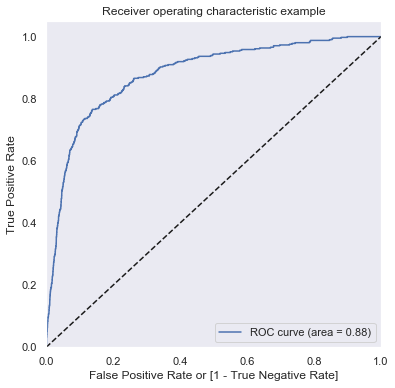

In [114]:
%matplotlib inline
draw_roc(y_test_pred_2.Churn, y_test_pred_2.Churn_Prob)

In [115]:
"{:2.2f}".format(metrics.roc_auc_score(y_test_pred_2.Churn, y_test_pred_2.Churn_Prob))

'0.88'

In [116]:
#Other metrics for test data
TP = confusion_test_2[1,1] # true positive 
TN = confusion_test_2[0,0] # true negatives
FP = confusion_test_2[0,1] # false positives
FN = confusion_test_2[1,0] # false negatives
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("False Positive Rate:", FP/ float(TN+FP))
print("Positive Predictive Value :", TP / float(TP+FP))
print("Negative Predictive Value :", TN / float(TN+FN))

Sensitivity: 0.7926829268292683
Specificity: 0.8189226519337016
False Positive Rate: 0.18107734806629835
Positive Predictive Value : 0.1986552567237164
Negative Predictive Value : 0.9858663119388095


Since our aim is to find the customers who will churn, we Sensitivity is important to us. Even though accuracy is high in this case, sensitivity is not so high.

#### 4.6.5.8 Finding Optimal Cutoff Point

In [117]:
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_2[i]= y_train_pred_2.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_2.head()

Churn           Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0                 0.21          0    1    1    1    0    0    0    0   
1      1                 0.99          1    1    1    1    1    1    1    1   
2      0                 0.34          0    1    1    1    1    0    0    0   
3      0                 0.25          0    1    1    1    0    0    0    0   
4      0                 0.01          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_2.Churn, y_train_pred_2[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob             accuracy                sensi  \
0.00                 0.00                 0.50                 1.00   
0.10                 0.10                 0.70                 0.98   
0.20                 0.20                 0.77                 0.96   
0.30                 0.30                 0.81                 0.94   
0.40                 0.40                 0.83                 0.90   
0.50                 0.50                 0.84                 0.86   
0.60                 0.60                 0.84                 0.80   
0.70                 0.70                 0.82                 0.71   
0.80                 0.80                 0.76                 0.58   
0.90                 0.90                 0.65                 0.32   

                    speci  
0.00                 0.00  
0.10                 0.42  
0.20                 0.58  
0.30                 0.68  
0.40                 0.77  
0.50                 0.83  
0.60                 0.88  
0.70                 0.92  
0.80                 0.95  
0.90                 0.97

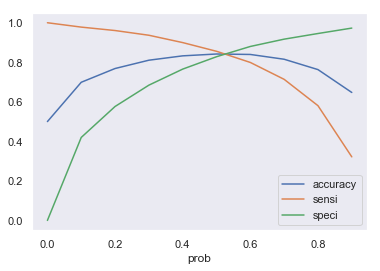

In [119]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Ideal cut-off point is ~.5. We made our previous anaysis with this so it is the final result.

## 4.6.6 Logistic Regression with class weight to handle imbalance instead of SMOTE

#### 4.6.6.1 Perform PCA on original data set

In [120]:
#Importing the PCA module
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [121]:
pca.components_

array([[-1.84006847e-02, -1.86378026e-02, -2.51201677e-02, ...,
         5.09615902e-03,  2.87329616e-03,  3.27417327e-02],
       [ 2.65205290e-02,  1.69947190e-02,  2.63533457e-03, ...,
         1.74205708e-02,  1.40616077e-02, -4.00763644e-04],
       [ 4.53346495e-03,  8.59913513e-03,  1.71678854e-02, ...,
        -8.94787914e-03, -5.98159072e-03, -3.98620076e-02],
       ...,
       [-0.00000000e+00,  1.18093489e-16, -1.23775039e-07, ...,
        -9.25948075e-08,  4.42083916e-09,  1.25070945e-17],
       [ 0.00000000e+00,  1.50403176e-16,  3.54863267e-08, ...,
         2.65469486e-08,  1.84655766e-08,  1.80650642e-18],
       [-4.07722675e-01, -5.17872482e-01,  1.45992396e-01, ...,
         4.39935970e-01,  7.91016558e-14,  4.07660017e-17]])

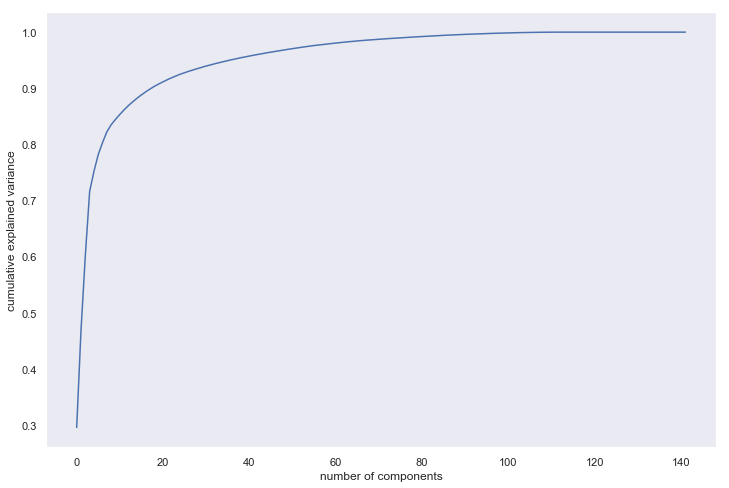

In [122]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [123]:
#pick features explaining 98% variance
pca_ci = PCA(.98)

In [124]:
df_train_pca_ci = pca_ci.fit_transform(X_train)
print(df_train_pca_ci.shape)
df_test_pca_ci = pca_ci.transform(X_test)
print(df_test_pca_ci.shape)

(17850, 61)
(7650, 61)


61 features explain 98% variance

#### 4.6.6.2 Hyperparameter tuning

In [125]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'C': [1, 10, 100, 1000, 1000000, 1000000000]}, {'class_weight': [{ 0:w, 1:1-w } for w in [.02, .03, .04, .05, .10]]}]

# step-3: perform grid search
# 3.1 specify model
lm = LogisticRegression()     

# 3.2 call GridSearchCV() with scoring=recall because Sensitivity is important in our case
model_cv = GridSearchCV(lm, hyper_params,scoring=['recall','accuracy'], cv=folds, refit='recall', verbose=0, return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca_ci,y_train)           

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000, 1000000, 1000000000]},
                         {'class_weight': [{0: 0.02, 1: 0.98},
                                           {0: 0.03, 1: 0.97},
                                           {0: 0.04, 1: 0.96},
                    

In [126]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_C', 'param_class_weight', 'mean_test_recall','mean_train_recall','mean_test_accuracy', 'mean_train_accuracy']]

param_C  param_class_weight     mean_test_recall    mean_train_recall  \
0            1                 NaN                 0.12                 0.12   
1           10                 NaN                 0.14                 0.14   
2          100                 NaN                 0.14                 0.15   
3         1000                 NaN                 0.14                 0.15   
4      1000000                 NaN                 0.14                 0.15   
5   1000000000                 NaN                 0.14                 0.15   
6          NaN  {0: 0.02, 1: 0.98}                 0.93                 0.94   
7          NaN  {0: 0.03, 1: 0.97}                 0.89                 0.90   
8          NaN  {0: 0.04, 1: 0.96}                 0.85                 0.86   
9          NaN  {0: 0.05, 1: 0.95}                 0.82                 0.83   
10         NaN    {0: 0.1, 1: 0.9}                 0.69                 0.71   

     mean_test_accuracy  mean_train_accuracy  
0                  0.94                 0.94  
1                  0.94                 0.94  
2                  0.94                 0.94  
3                  0.94                 0.94  
4                  0.94                 0.94  
5                  0.94                 0.94  
6                  0.57                 0.57  
7                  0.68                 0.68  
8                  0.75                 0.75  
9                  0.80                 0.80  
10                 0.89                 0.89

In [127]:
best_values = model_cv.best_estimator_.get_params()
print('Best value of C:',best_values['C'])
print('Best value of class_weight:',best_values['class_weight'])

Best value of C: 1.0
Best value of class_weight: {0: 0.02, 1: 0.98}


Even though best values for recall are C=1 and class_Weight={0:.02,1:.98}, with recall of 90+%, accuracy drops significantly to 47%. SO choosing class_weight {0: 0.04, 1: 0.96} instead.

<a id='FinalPredictionModel'></a>
#### 4.6.6.3 Train model

In [128]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca_ci = LogisticRegression(C=1, class_weight={0: 0.04, 1: 0.96})
model_pca_ci = learner_pca_ci.fit(df_train_pca_ci,y_train)

In [129]:
#Making prediction on the test data
pred_probs_test_ci = model_pca_ci.predict_proba(df_test_pca_ci)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_ci))

'0.88'

#### 4.6.6.4 Make Predictions

In [130]:
#Make predictions
y_train_pred_ci = model_pca_ci.predict_proba(df_train_pca_ci)[:,1]
y_test_pred_ci = model_pca_ci.predict_proba(df_test_pca_ci)[:,1]

In [131]:
y_train_pred_final_ci = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred_ci})
y_train_pred_final_ci.head()
y_train_pred_final_ci['predicted'] = y_train_pred_final_ci.Churn_Prob.map(lambda x: 1 if x > 0.50 else 0)
y_test_pred_final_ci = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred_ci})
y_test_pred_final_ci.head()
y_test_pred_final_ci['predicted'] = y_test_pred_final_ci.Churn_Prob.map(lambda x: 1 if x > 0.50 else 0)
# Let's see the head
y_test_pred_final_ci.head()

Churn           Churn_Prob  predicted
12067      0                 0.36          0
5991       0                 0.51          1
37287      0                 0.40          0
29754      0                 0.08          0
24501      0                 0.35          0

In [132]:
confusion_test_ci = metrics.confusion_matrix(y_test_pred_final_ci.Churn, y_test_pred_final_ci.predicted )
print(confusion_test_ci)
print("Accuracy of test data:", metrics.accuracy_score(y_test_pred_final_ci.Churn, y_test_pred_final_ci.predicted))
print("Recall of test data:",metrics.recall_score(y_test_pred_final_ci.Churn, y_test_pred_final_ci.predicted))
confusion_train_ci = metrics.confusion_matrix(y_train_pred_final_ci.Churn, y_train_pred_final_ci.predicted )
print(confusion_train_ci)
print("Accuracy of train data:", metrics.accuracy_score(y_train_pred_final_ci.Churn, y_train_pred_final_ci.predicted))
print("Recall of train data:", metrics.recall_score(y_train_pred_final_ci.Churn, y_train_pred_final_ci.predicted))

[[5326 1914]
 [  58  352]]
Accuracy of test data: 0.7422222222222222
Recall of test data: 0.8585365853658536
[[12571  4281]
 [  139   859]]
Accuracy of train data: 0.7523809523809524
Recall of train data: 0.8607214428857716


In [133]:
#Other metrics for test data
TP = confusion_test_ci[1,1] # true positive 
TN = confusion_test_ci[0,0] # true negatives
FP = confusion_test_ci[0,1] # false positives
FN = confusion_test_ci[1,0] # false negatives
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("False Positive Rate:", FP/ float(TN+FP))
print("Positive Predictive Value :", TP / float(TP+FP))
print("Negative Predictive Value :", TN / float(TN+FN))

Sensitivity: 0.8585365853658536
Specificity: 0.7356353591160221
False Positive Rate: 0.2643646408839779
Positive Predictive Value : 0.1553398058252427
Negative Predictive Value : 0.9892273402674592


#### 4.6.6.5 Find optimal cut-off

In [134]:
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.525,0.55,0.575,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final_ci[i]= y_train_pred_final_ci.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_ci.head()

Churn           Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
96840      0                 0.38          0    1    1    1    1    0    0   
5574       1                 0.98          1    1    1    1    1    1    1   
34786      0                 0.48          0    1    1    1    1    1    0   
7090       0                 0.30          0    1    1    1    0    0    0   
74899      0                 0.08          0    1    0    0    0    0    0   

       0.525  0.55  0.575  0.6  0.7  0.8  0.9  
96840      0     0      0    0    0    0    0  
5574       1     1      1    1    1    1    1  
34786      0     0      0    0    0    0    0  
7090       0     0      0    0    0    0    0  
74899      0     0      0    0    0    0    0

In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.525,0.55,0.575,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_ci.Churn, y_train_pred_final_ci[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob             accuracy                sensi  \
0.00                 0.00                 0.06                 1.00   
0.10                 0.10                 0.21                 0.99   
0.20                 0.20                 0.38                 0.98   
0.30                 0.30                 0.54                 0.95   
0.40                 0.40                 0.65                 0.91   
0.50                 0.50                 0.75                 0.86   
0.53                 0.53                 0.77                 0.85   
0.55                 0.55                 0.79                 0.83   
0.57                 0.57                 0.81                 0.81   
0.60                 0.60                 0.83                 0.80   
0.70                 0.70                 0.89                 0.72   
0.80                 0.80                 0.92                 0.56   
0.90                 0.90                 0.94                 0.29   

                    speci  
0.00                 0.00  
0.10                 0.16  
0.20                 0.35  
0.30                 0.51  
0.40                 0.64  
0.50                 0.75  
0.53                 0.77  
0.55                 0.79  
0.57                 0.81  
0.60                 0.83  
0.70                 0.90  
0.80                 0.94  
0.90                 0.98

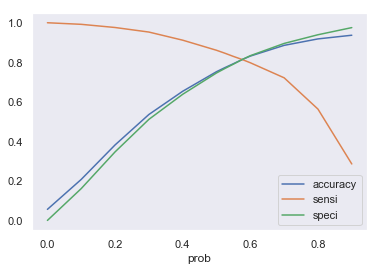

In [136]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Even though ideal cut-off is close to 0.6 but since we prefer higher recall, we will go ahead with model with 0.5 cutoff

We got a model with ~86% recall and 74% accuracy with logistic regression using class_weight. Our previous model with SMOTE was with accuracy 82% bur lower recall of 79%. 

### 4.6.7 SVM

- Let's try SVM because Logistic regresion gave good recall and accuracy but there is a scope for improvement

#### 4.6.7.1 Build model

In [139]:
from sklearn.svm import SVC
model = SVC(C = 1)

# fit
model.fit(df_tr_pca, y_tr)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [140]:
# predict
y_train_pred_svm = model.predict(df_tr_pca)
y_test_pred_svm = model.predict(df_test_pca)

#### 4.6.7.2 Model Evaluation

In [141]:
confusion_test_svm = metrics.confusion_matrix(y_test, y_test_pred_svm )
print(confusion_test_svm)
print("Accuracy of test data:", metrics.accuracy_score(y_test, y_test_pred_svm))
print("Recall of test data:",metrics.recall_score(y_test, y_test_pred_svm))
confusion_train_svm = metrics.confusion_matrix(y_tr, y_train_pred_svm)
print(confusion_train_svm)
print("Accuracy of train data:", metrics.accuracy_score(y_tr, y_train_pred_svm))
print("Recall of train data:", metrics.recall_score(y_tr, y_train_pred_svm))

[[6005 1235]
 [  82  328]]
Accuracy of test data: 0.827843137254902
Recall of test data: 0.8
[[14189  2663]
 [ 2426 14426]]
Accuracy of train data: 0.8490090197009257
Recall of train data: 0.8560408260147163


We got good accuracy(83%) and recall(80%)

#### 4.6.7.3 Hyperparameter tuning

In [142]:
# specify range of parameters (C) as a list
#It takes lot of time to run so commenting out the code
'''
params = {"C": [0.1, 1, 10, 100, 1000]}

folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True, n_jobs=2)'''      

'\nparams = {"C": [0.1, 1, 10, 100, 1000]}\n\nfolds = KFold(n_splits = 3, shuffle = True, random_state = 100)\n\nmodel = SVC()\n\n# set up grid search scheme\n# note that we are still using the 5 fold CV scheme we set up earlier\nmodel_cv = GridSearchCV(estimator = model, param_grid = params, \n                        scoring= \'recall\', \n                        cv = folds, \n                        verbose = 1,\n                       return_train_score=True, n_jobs=2)'

In [143]:
# fit the model - it will fit 3 folds across all values of C
#model_cv.fit(df_tr_pca, y_tr)  

In [144]:
# results of grid search CV
#cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results

In [145]:
# plot of C versus train and test scores
'''plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')'''

"plt.figure(figsize=(8, 6))\nplt.plot(cv_results['param_C'], cv_results['mean_test_score'])\nplt.plot(cv_results['param_C'], cv_results['mean_train_score'])\nplt.xlabel('C')\nplt.ylabel('Accuracy')\nplt.legend(['test accuracy', 'train accuracy'], loc='upper left')\nplt.xscale('log')"

In [146]:
'''best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test recall is {0} at C = {1}".format(best_score, best_C))'''

'best_score = model_cv.best_score_\nbest_C = model_cv.best_params_[\'C\']\nprint(" The highest test recall is {0} at C = {1}".format(best_score, best_C))'

In [147]:
# model with the best value of C
#model = SVC(C=model_cv.best_params_['C'])

# fit
#model.fit(df_tr_pca, y_tr)

In [148]:
# predict
#y_train_pred_svm = model.predict(df_tr_pca)
#y_test_pred_svm = model.predict(df_test_pca)

In [149]:
'''confusion_test_svm = metrics.confusion_matrix(y_test, y_test_pred_svm )
print(confusion_test_svm)
print("Accuracy of test data:", metrics.accuracy_score(y_test, y_test_pred_svm))
print("Recall of test data:",metrics.recall_score(y_test, y_test_pred_svm))
confusion_train_svm = metrics.confusion_matrix(y_tr, y_train_pred_svm)
print(confusion_train_svm)
print("Accuracy of train data:", metrics.accuracy_score(y_tr, y_train_pred_svm))
print("Recall of train data:", metrics.recall_score(y_tr, y_train_pred_svm))'''

'confusion_test_svm = metrics.confusion_matrix(y_test, y_test_pred_svm )\nprint(confusion_test_svm)\nprint("Accuracy of test data:", metrics.accuracy_score(y_test, y_test_pred_svm))\nprint("Recall of test data:",metrics.recall_score(y_test, y_test_pred_svm))\nconfusion_train_svm = metrics.confusion_matrix(y_tr, y_train_pred_svm)\nprint(confusion_train_svm)\nprint("Accuracy of train data:", metrics.accuracy_score(y_tr, y_train_pred_svm))\nprint("Recall of train data:", metrics.recall_score(y_tr, y_train_pred_svm))'

Even after hyperparameter tuning, we didnt see any significant improvement in recall. So commented out the code to save execution time since this is not our final model.

__Conclusion__:
1. SVM gives moderate test recall and accuracy- 80% and 83% and it's computationaly heavy.
2. Our logistic regression model with class_weight tuning gave testAccuracy of ~74% and Recall of ~86%. 
3. So final prediction model is Logistic regression.
4. Since in our case Recall/Sensitivity is important parameter, we can compromise on accuracy and go ahead with model developed in section __4.6.6__  [FinalPredictionModel](#FinalPredictionModel)

## 4.7 Decision Tree

### 4.7.1 Using Lasso as feature reduction mechanism as it will penalize high features if present in model

In [150]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

svc = LinearSVC(C=0.001, penalty="l1", dual=False)
lasso=svc.fit(X_tr, y_tr)
model = SelectFromModel(lasso, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)

print(X_lasso.shape)
print(pos)


(33704, 11)
[ 29  80  95 101 125 126 134 135 136 139 140]


In [151]:
l_features = list(filtered_data.columns[pos])
print(l_features)

['loc_og_mou_7', 'total_ic_mou_7', 'total_rech_amt_7', 'last_day_rch_amt_7', 'fb_user_7', 'fb_user_8', 'avg_rech', 'churn', 'week_of_last_rech_6', 'avg_rech_amt', 'avg_arpu']


Lasso gave 11 features, we will use these to build our decision tree.

### 4.7.2 Build Decision tree model

In [152]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_lasso, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 4.7.3 Perform prediction and evaluate model

In [153]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test_lasso = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test_lasso)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7240
           1       0.22      0.78      0.34       410

    accuracy                           0.84      7650
   macro avg       0.60      0.81      0.62      7650
weighted avg       0.94      0.84      0.88      7650



In [154]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print("Accuracy:", accuracy_score(y_test,y_pred_default))
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test,y_pred_default))

[[6086 1154]
 [  92  318]]
Accuracy: 0.8371241830065359
Recall: 0.775609756097561


Sensitivity is low... we will tune the decision tree

### 4.7.4 Plotting the Decision Tree

Use ```graphviz``` library to plot a tree.

In [155]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features

features = l_features

C:\Users\Peenu\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


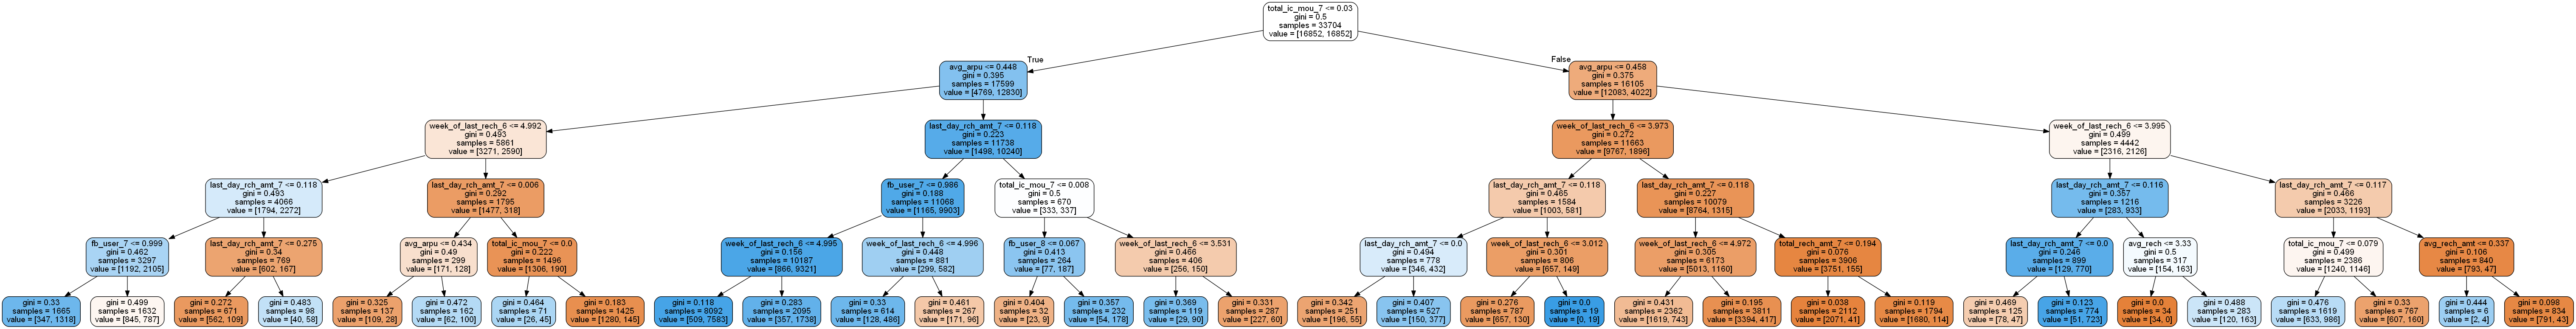

In [156]:
# plotting tree with max_depth=5
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<hr>

### 4.7.5 Hyperparameter Tuning

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

#### 4.7.5.1 Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [157]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(1, 150, 30),
    'min_samples_split': range(2, 150, 30),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring=['recall',"accuracy"], refit='recall')

# Fit the grid search to the data
grid_search.fit(X_lasso,y_tr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [158]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)

In [159]:
cv_results[['param_criterion','param_max_depth', 'param_min_samples_leaf','param_min_samples_split','mean_test_recall','mean_test_accuracy']]

param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                      1   
1          entropy               5                      1   
2          entropy               5                      1   
3          entropy               5                      1   
4          entropy               5                      1   
5          entropy               5                     31   
6          entropy               5                     31   
7          entropy               5                     31   
8          entropy               5                     31   
9          entropy               5                     31   
10         entropy               5                     61   
11         entropy               5                     61   
12         entropy               5                     61   
13         entropy               5                     61   
14         entropy               5                     61   
15         entropy               5                     91   
16         entropy               5                     91   
17         entropy               5                     91   
18         entropy               5                     91   
19         entropy               5                     91   
20         entropy               5                    121   
21         entropy               5                    121   
22         entropy               5                    121   
23         entropy               5                    121   
24         entropy               5                    121   
25         entropy              10                      1   
26         entropy              10                      1   
27         entropy              10                      1   
28         entropy              10                      1   
29         entropy              10                      1   
..             ...             ...                    ...   
70            gini               5                    121   
71            gini               5                    121   
72            gini               5                    121   
73            gini               5                    121   
74            gini               5                    121   
75            gini              10                      1   
76            gini              10                      1   
77            gini              10                      1   
78            gini              10                      1   
79            gini              10                      1   
80            gini              10                     31   
81            gini              10                     31   
82            gini              10                     31   
83            gini              10                     31   
84            gini              10                     31   
85            gini              10                     61   
86            gini              10                     61   
87            gini              10                     61   
88            gini              10                     61   
89            gini              10                     61   
90            gini              10                     91   
91            gini              10                     91   
92            gini              10                     91   
93            gini              10                     91   
94            gini              10                     91   
95            gini              10                    121   
96            gini              10                    121   
97            gini              10                    121   
98            gini              10                    121   
99            gini              10                    121   

   param_min_samples_split     mean_test_recall   mean_test_accuracy  
0                        2                 0.80                 0.82  
1                       32                 0.80                 0.82  
2      

In [160]:
# printing the optimal accuracy score and hyperparameters
print("best score: ", grid_search.best_score_)
print("best estimators: ", grid_search.best_estimator_)

best score:  0.8977569427961073
best estimators:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


<hr>

**Running the model with best parameters obtained from grid search.**

In [161]:
# model with optimal hyperparameters
#By checking the hyperparameters manualy, rerun the Decision tree
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=10,
                       min_samples_leaf=61, min_samples_split=122)
clf_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=61, min_samples_split=122,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [162]:
# accuracy score
clf_gini.score(X_lasso, y_tr)

0.8740208877284595

In [163]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test_lasso)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7240
           1       0.21      0.78      0.33       410

    accuracy                           0.83      7650
   macro avg       0.60      0.81      0.61      7650
weighted avg       0.94      0.83      0.87      7650



In [164]:
# confusion matrix, accuracy and recall
print(confusion_matrix(y_test,y_pred_default))
# Printing confusion matrix and accuracy
print("Accuracy:", accuracy_score(y_test,y_pred))
from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test,y_pred))

[[6086 1154]
 [  92  318]]
Accuracy: 0.8281045751633986
Recall: 0.7804878048780488


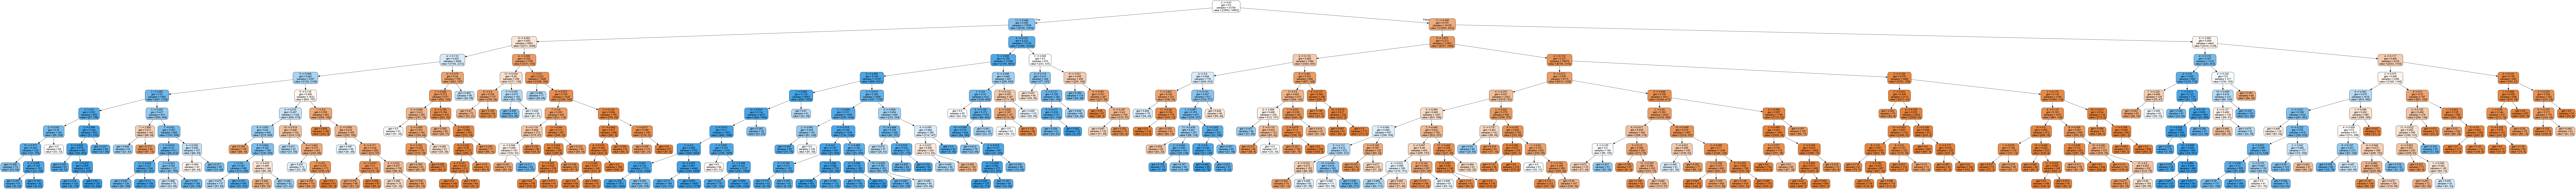

In [165]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=range(1,X_lasso.shape[1]+1),filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 4.8 Random Forest

Let's see if we get any improvement in recall using random forest

### 4.8.1 Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [166]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [167]:
# fit
rfc.fit(X_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
# Making predictions
predictions = rfc.predict(X_test)

In [169]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy on test data:", accuracy_score(y_test,predictions))
print("Recall on test data:", recall_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7240
           1       0.40      0.48      0.43       410

    accuracy                           0.93      7650
   macro avg       0.68      0.72      0.70      7650
weighted avg       0.94      0.93      0.94      7650

[[6939  301]
 [ 213  197]]
Accuracy on test data: 0.9328104575163398
Recall on test data: 0.48048780487804876


### 4.8.2 Hyperparametr Tuning

#### 4.8.2.1 Tuning max_depth (The maximum depth of the tree)

In [170]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=["recall", "accuracy"], refit="recall",return_train_score=True)
rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [171]:
scores = pd.DataFrame(rf.cv_results_)
scores[['param_max_depth', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]

param_max_depth    mean_train_recall     mean_test_recall  \
0               2                 0.81                 0.81   
1               5                 0.88                 0.87   
2               8                 0.95                 0.93   
3              11                 0.99                 0.96   
4              14                 1.00                 0.97   
5              17                 1.00                 0.97   

   mean_train_accuracy   mean_test_accuracy  
0                 0.84                 0.84  
1                 0.89                 0.88  
2                 0.94                 0.92  
3                 0.97                 0.95  
4                 0.99                 0.96  
5                 0.99                 0.96

In [172]:
# # plotting accuracies/recall with max_depth
def plotDTAccuracyRecall(scores, hyperParameter):
    fig = plt.figure(figsize = (16,8))
    plt.subplot(1, 2, 1)
    plt.plot(scores['param_' + hyperParameter], 
              scores["mean_train_recall"], 
              label="training recall")
    plt.plot(scores['param_' + hyperParameter], 
              scores["mean_test_recall"], 
              label="test recall")
    plt.xlabel(hyperParameter)
    plt.ylabel("Recall")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(scores['param_' + hyperParameter], 
              scores["mean_train_accuracy"], 
              label="training accuracy")
    plt.plot(scores['param_' + hyperParameter], 
              scores["mean_test_accuracy"], 
              label="test accuracy")
    plt.xlabel(hyperParameter)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

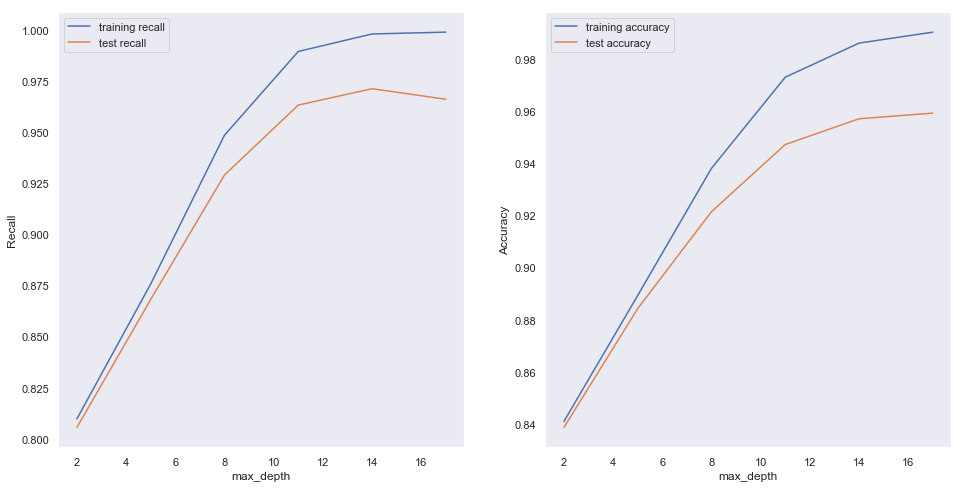

In [173]:
plotDTAccuracyRecall(scores,"max_depth")

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

#### 4.8.2.2 Tuning n_estimators (The number of trees in the forest.)

In [174]:
# GridSearchCV to find optimal n_estimators
#THIS IS TAKING FOREVER TO RUN...
'''
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 300, 100)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=["recall", "accuracy"], refit="recall",return_train_score=True)
rf.fit(X_tr, y_tr)'''

'\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import GridSearchCV\n\n\n# specify number of folds for k-fold CV\nn_folds = 5\n\n# parameters to build the model on\nparameters = {\'n_estimators\': range(100, 300, 100)}\n\n# instantiate the model (note we are specifying a max_depth)\nrf = RandomForestClassifier(max_depth=4)\n\n\n# fit tree on training data\nrf = GridSearchCV(rf, parameters, \n                    cv=n_folds, \n                   scoring=["recall", "accuracy"], refit="recall",return_train_score=True)\nrf.fit(X_tr, y_tr)'

In [175]:
'''scores = pd.DataFrame(rf.cv_results_)
scores[['param_n_estimators', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]'''

"scores = pd.DataFrame(rf.cv_results_)\nscores[['param_n_estimators', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]"

In [176]:
#plotDTAccuracyRecall(scores,"n_estimators")

#### 4.8.2.3 Tuning max_features (The number of features to consider when looking for the best split)

In [177]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=["recall", "accuracy"], refit="recall",return_train_score=True)
rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [178]:
scores = pd.DataFrame(rf.cv_results_)
scores[['param_max_features', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]

param_max_features    mean_train_recall     mean_test_recall  \
0                  4                 0.84                 0.83   
1                  8                 0.85                 0.84   
2                 14                 0.87                 0.86   
3                 20                 0.86                 0.86   
4                 24                 0.87                 0.87   

   mean_train_accuracy   mean_test_accuracy  
0                 0.86                 0.86  
1                 0.87                 0.87  
2                 0.88                 0.88  
3                 0.88                 0.87  
4                 0.88                 0.88

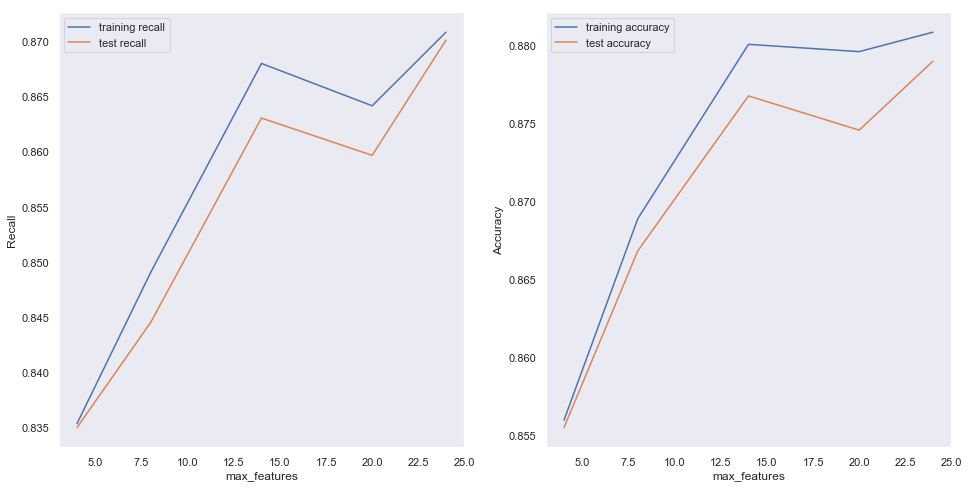

In [179]:
plotDTAccuracyRecall(scores,"max_features")

#### 4.8.2.4 Tuning min_samples_leaf (The minimum number of samples required to be at a leaf node)

In [180]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=["recall", "accuracy"], refit="recall",return_train_score=True)
rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [181]:
scores = pd.DataFrame(rf.cv_results_)
scores[['param_min_samples_leaf', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]

param_min_samples_leaf    mean_train_recall     mean_test_recall  \
0                    100                 0.90                 0.90   
1                    150                 0.89                 0.88   
2                    200                 0.88                 0.87   
3                    250                 0.88                 0.87   
4                    300                 0.87                 0.86   
5                    350                 0.87                 0.86   

   mean_train_accuracy   mean_test_accuracy  
0                 0.91                 0.90  
1                 0.90                 0.89  
2                 0.89                 0.89  
3                 0.89                 0.89  
4                 0.88                 0.88  
5                 0.88                 0.88

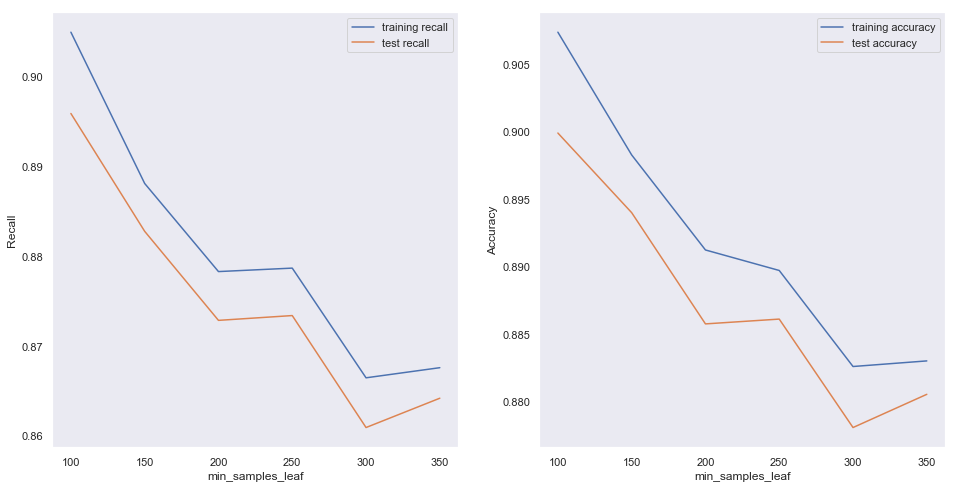

In [182]:
plotDTAccuracyRecall(scores,"min_samples_leaf")

#### 4.8.2.5 Tuning min_samples_split

In [183]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=["recall", "accuracy"], refit="recall",return_train_score=True)
rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [184]:
scores = pd.DataFrame(rf.cv_results_)
scores[['param_min_samples_split', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]

param_min_samples_split    mean_train_recall     mean_test_recall  \
0                     200                 0.92                 0.90   
1                     250                 0.91                 0.90   
2                     300                 0.91                 0.90   
3                     350                 0.90                 0.89   
4                     400                 0.89                 0.88   
5                     450                 0.89                 0.88   

   mean_train_accuracy   mean_test_accuracy  
0                 0.93                 0.91  
1                 0.92                 0.91  
2                 0.92                 0.91  
3                 0.91                 0.91  
4                 0.91                 0.90  
5                 0.91                 0.90

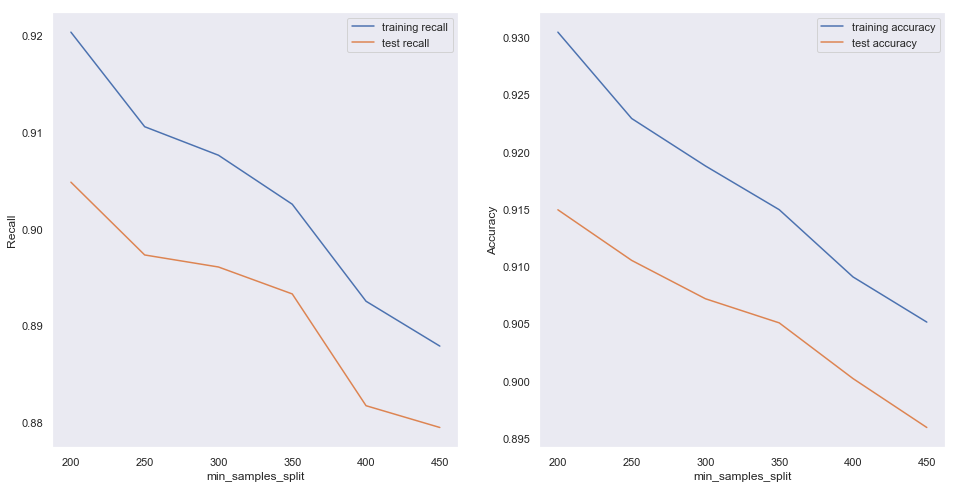

In [185]:
plotDTAccuracyRecall(scores,"min_samples_split")

#### 4.8.2.6 Grid Search to Find Optimal Hyperparameters¶

In [186]:
# Create the parameter grid based on the results of random search 
'''param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200], 
    'max_features': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring=["recall", "accuracy"], refit="recall",return_train_score=True)'''

'param_grid = {\n    \'max_depth\': [4,8,10],\n    \'min_samples_leaf\': range(100, 400, 200),\n    \'min_samples_split\': range(200, 500, 200),\n    \'n_estimators\': [100,200], \n    \'max_features\': [5, 10, 15]\n}\n# Create a based model\nrf = RandomForestClassifier()\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator = rf, param_grid = param_grid, \n                          cv = 3, n_jobs = -1,verbose = 1,scoring=["recall", "accuracy"], refit="recall",return_train_score=True)'

In [187]:
# Fit the grid search to the data
#grid_search.fit(X_tr, y_tr)

In [188]:
rf_best_params = {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 275, 'min_samples_split': 275, 'n_estimators': 100}
#print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)
#rf_best_params = grid_search.best_params_

Since hyperparameter tuning is takinglot of time to run, we are commenting it out.

Output of hyperparameter tuning: We can get recall of 0.9025012478509234 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}

In [189]:
#scores = pd.DataFrame(grid_search.cv_results_)
#scores[['param_max_depth','param_min_samples_leaf','param_min_samples_split','param_max_features','param_n_estimators', 'mean_train_recall', 'mean_test_recall','mean_train_accuracy','mean_test_accuracy']]

#### 4.8.2.7 Fitting the final model with the best parameters obtained from grid search
<a id='Final_interpretation_model'></a>

In [190]:
#Taking all the best estimators except max_depth=10 because it might overfit the decision trees
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=rf_best_params['min_samples_leaf'], 
                             min_samples_split=rf_best_params['min_samples_split'],
                             max_features=rf_best_params['max_features'],
                             n_estimators=rf_best_params['n_estimators'])

In [191]:
rfc.fit(X_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=275, min_samples_split=275,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [192]:
predictions = rfc.predict(X_test)
predictions_train = rfc.predict(X_tr)

In [193]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("Accuracy of test data:", accuracy_score(y_test,predictions))
print("Recall of test data:", recall_score(y_test,predictions))

print(classification_report(y_tr,predictions_train))
print(confusion_matrix(y_tr,predictions_train))
print("Accuracy of train data:", accuracy_score(y_tr,predictions_train))
print("Recall of train data:", recall_score(y_tr,predictions_train))

              precision    recall  f1-score   support

           0       0.98      0.89      0.94      7240
           1       0.27      0.71      0.39       410

    accuracy                           0.88      7650
   macro avg       0.63      0.80      0.66      7650
weighted avg       0.94      0.88      0.91      7650

[[6461  779]
 [ 118  292]]
Accuracy of test data: 0.8827450980392156
Recall of test data: 0.7121951219512195
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     16852
           1       0.90      0.87      0.88     16852

    accuracy                           0.89     33704
   macro avg       0.89      0.89      0.89     33704
weighted avg       0.89      0.89      0.89     33704

[[15179  1673]
 [ 2182 14670]]
Accuracy of train data: 0.8856218846427724
Recall of train data: 0.8705198196059815


We are getting good results from Random Forest with high accuracy of 88% and decent recall of ~71%. 

Now we will find the important features using feature_importance_ from Random forst model




#### 4.8.2.8 Get important features

In [194]:
#list first 15 important features in descending order
indices = np.argsort(rfc.feature_importances_)[::-1]

for f in range(0,15):
    print("%2d) %-*s %f" % (f + 1, 30, X_train.columns[indices[f]], rfc.feature_importances_[indices[f]])) 

 1) roam_ic_mou_8                  0.104182
 2) roam_og_mou_8                  0.099142
 3) loc_ic_mou_8                   0.069294
 4) drop_in_mou_8                  0.054278
 5) loc_ic_t2m_mou_8               0.050557
 6) drop_in_arpu_8                 0.050529
 7) max_rech_amt_8                 0.048467
 8) total_ic_mou_8                 0.048110
 9) roam_og_mou_7                  0.034946
10) week_of_last_rech_8            0.030987
11) total_data_rech_amt_8          0.030231
12) last_day_rch_amt_8             0.026802
13) total_rech_amt_8               0.026502
14) fb_user_8                      0.025988
15) loc_og_t2m_mou_8               0.025800


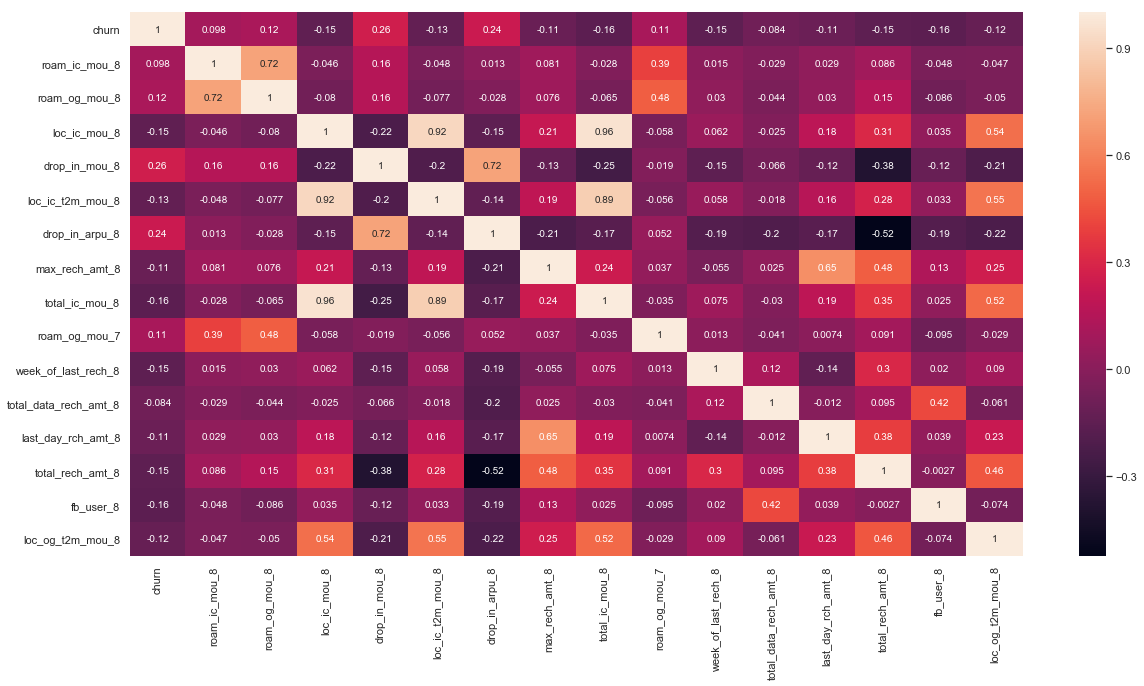

In [195]:
plt.subplots(figsize=(20,10))
columns =  [X_train.columns[indices[f]] for f in range(0,15)]
columns.insert(0, 'churn')
        
data=filtered_data[columns]    
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)

As seen in above heatmap:
- Few features have positive correlation with Churn which means that with increase in thesefeatures, churn rate increases. Example-roam_og_mou_8, roam_ic_mou_8, drop_in_arpu_8,drop_in_mou_8
- Few features have negative correlation with churn rate. Example-total_ic_mou_8, last_day_rch_amt_8, loc_ic_mou_8, total_rech_amt_8, etc.
- These features do not have very high correlation so combination of these impact churn.

Let's plot some of these features and see how they impact churn.

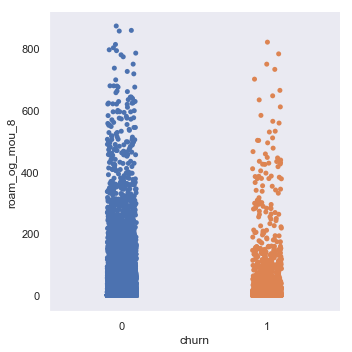

In [196]:
sns.catplot(x="churn", y="roam_og_mou_8", data=filtered_data)

- As seen from the above plot if roaming out min of usage is less than ~400 there are higher chances of churn

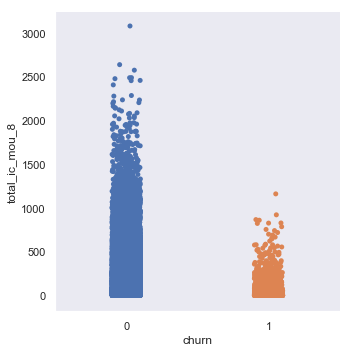

In [197]:
sns.catplot(x="churn", y="total_ic_mou_8", data=filtered_data)

- As seen from above plot if the total incoming minutes of usage (8th month) is less than ~500 there is high chances of churn

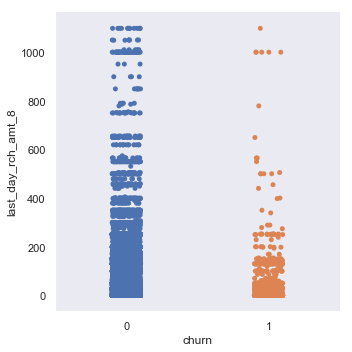

In [198]:
sns.catplot(x="churn", y="last_day_rch_amt_8", data=filtered_data)

- As seen from above plot most of the churn are having last day recharge amount (in 8th month) less than 225

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


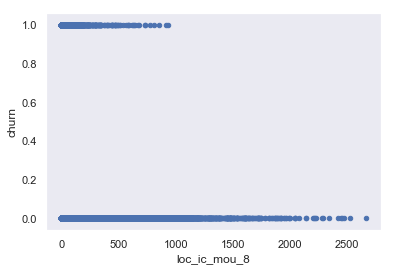

In [199]:
filtered_data.plot.scatter(x='loc_ic_mou_8',y='churn')

- As seen from above plot hogher churn customers have lower local incoming minutes of usage ~<1000

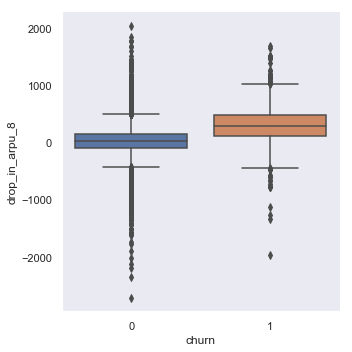

In [200]:
sns.catplot(x="churn", y="drop_in_arpu_8", kind='box', data=filtered_data);

- As seen from above plot more churned customers are having higher drop in average revenue than non churned.

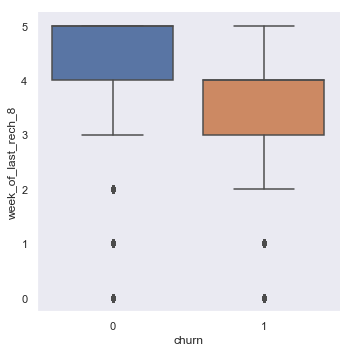

In [201]:
sns.catplot(x="churn", y="week_of_last_rech_8", kind='box', data=filtered_data)

- As seen from plot if recharge is done in the last week people have churned less as compared to non churned .

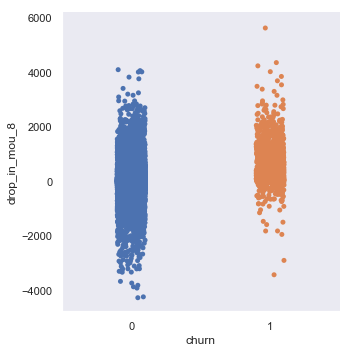

In [202]:
sns.catplot(x="churn", y="drop_in_mou_8", data=filtered_data)


As seen from above plot drop in minutes of usage is more for churned customer

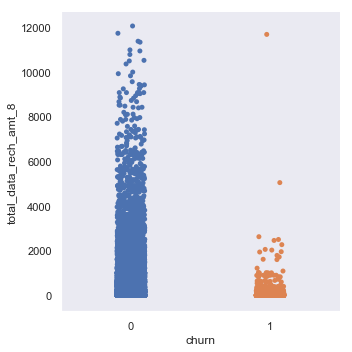

In [203]:
sns.catplot(x="churn", y="total_data_rech_amt_8", data=filtered_data)

Customer who have churned have very low total data recharge amount. Seems that they do data recharge very less.

# 5 Conclusion

- Our objective was to build 2 models one for prediction and another for identifying features driving churn
- We have to give recomendations for the telecom company to reduce churn for high value customers.

## 5.1 Model for Prediction

We had 130+ features so to build a model for prediction we followed following steps:

1. First we perform feature scaling anf SMOTE to handle class imbalance.
2. Since we had many correlated features, we performed PCA to get the uncorrelated Principle components.
3. We selected ~54 Principle Components explaing 98% variance and using these features developed a Logistic Regression model.
4. Performed hyperparameters tuning using scoring=recall and calculated optimal cut-off point to get better results. Our  model gave 82% accuracy(test data) and 79% recall(test data).
5. Then we tried another hyperparameter in Logistic Regression-class_weight. So instead of using SMOTE, we performed PCA and selected features explaing 98% variance(~61 principle components).
6. Performed hyperparameter tuning of C and class_weight using GridSearchCV and built a model with 74% accuracy and 86% recall. 
7. Since we want to correctly predit Churned customers, __we selected model with higher recall__ and compromised a little on accuracy.
So our __final prediction model__ is Logistic regression with custom class_weight hyperparameter .

Link to final Model: [Final Prediction Model](#FinalPredictionModel)

8. We also tried SVM but didn't see improvement on recall. We got 83% accuracy and 80% recall. Since SVM is computationally heavy, we decided to not consider it for our prediction model. 

## 5.2 Model for identifying features driving Churn

To identify driving features, we decided to go with tree based models because they are more intuitive and easy to interpret.

1. First we built a decision tree with max_depth=5 and default hyperparameters. We got 84% Accuracy and ~78% recall.
2. Then we performed hyperparameter tuning of max_depth, min_sample_leafs, min_sample_split, etc with scoring=recall.
3. We rebuilt decision tree with best estimators from hyperparameter tuning  and got 83% accuracy and 78% recall.
4. We also tried random forest to get better accuracy and recall.
After hyperparameter tuning our model gave 88% accuracy and 71% recall.
We used this model to identify features driving churn using feature importance given by random forest. This is our final model for feature interpretation. Link: [Final_interpretation_model](#Final_interpretation_model)

We have identified following driving features:

- roam_ic_mou_8            
- roam_og_mou_8            
- loc_ic_mou_8           
- drop_in_mou_8          
- loc_ic_t2m_mou_8     
- drop_in_arpu_8         
- max_rech_amt_8        
- total_ic_mou_8        
- roam_og_mou_7         
- week_of_last_rech_8

### 6. Finally, recommend strategies to manage customer churn based on your observations.

According to the features derived we can suggest various strategies to identify and reduce high value customer churning.

We can identify customer going to churn using combination of folowing conditions:

- __If roaming incoming and outgoing minutes of usage is more in month 8 and roaming outgoing minutes of usage for month 7 is also more, the customer is likely to churn. The reason might be as the customer wants to make more calls and finish his balance and talk time and then change the service provider__
- __If we see high drop in total minutes of usage in 8th month for a customer as compared to the average in 6th and 7th month the customer is likely to churn.__
- __If we see high drop in average revenue in 8th month for a customer as compared to the average in 6th and 7th month the customer is likely to churn. That means cuatomer does not want to purchase any new packs or special recharges as he wants to switch to new service provider__
- __If total/local incoming and local outgoing minutes of usage is less in month 8 the customer is likely to churn.__
- __Maximum recharge amount is lower for customer who are churning as they want services only for few days till they get new connection.__
- __Total data recharge amount is less for churned customers as they do less recharge before churning which lasts for only few days.__
 
 
 Recommended Strategies to handle churn:
 1. Identify customers likely to churn using above parameters then give them offers/discounts to retain them.
 2. Service provider should check recent complaints from these customers and see if they are facing any particular issues and assure them the resolution along with some benefits.
 3. Service provider can also make feedback calls to get the customer feedback and decide strategy to retain them.
 4. Based on the customer data and call usage and recharge history, provide them offers in that recharge segments.
 5. Provide customized budget roaming packs if customers frequently uses roaming services.
 